# Importing Functions

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Creating the differential models of the gates

# 2-input AND gate



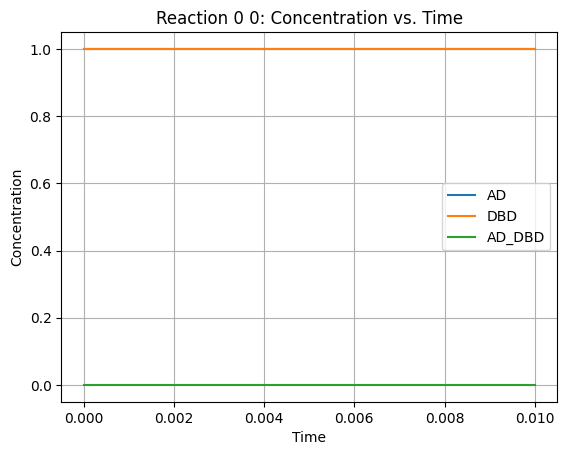

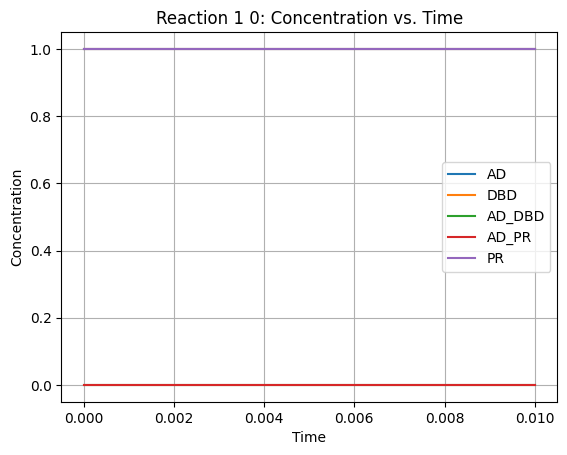

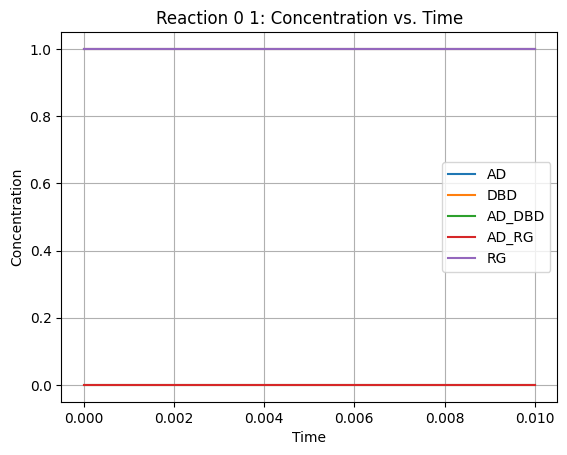

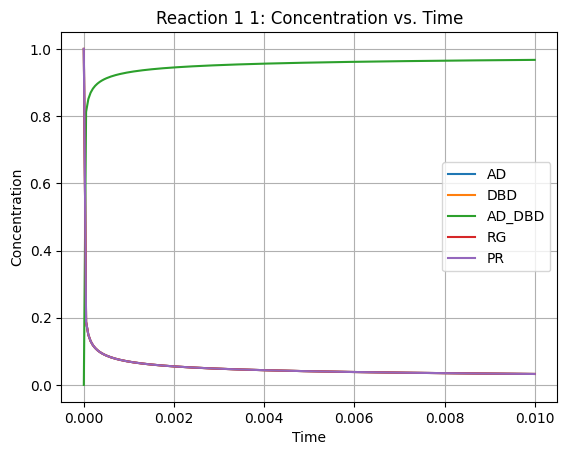

In [ ]:

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#0 0
#AD+DBD ⇌ ADDBD
def reaction1(y, t, k1f, k1r):
  AD, DBD, AD_DBD = y
  dADdt = -k1f * AD * DBD + k1r * AD_DBD
  dDBDdt = -k1f * AD * DBD + k1r * AD_DBD
  dAD_DBDdt = k1f * AD * DBD - k1r * AD_DBD
  return [dADdt, dDBDdt, dAD_DBDdt]
#1 0
#AD+DBD ⇌ ADDBD (k1)
#AD+P-R' ⇌ ADP-R'(k2)
def reaction2(y, t, k1f, k1r, k2f, k2r):
  AD, DBD, AD_DBD, AD_PR, PR = y
  dADdt = -k1f * AD * DBD + k1r * AD_DBD - k2f*AD*PR + k2r*AD_PR
  dPRdt = - k2f*AD*PR + k2r*AD_PR
  dDBDdt = -k1f * AD * DBD + k1r * AD_DBD
  dAD_DBDdt = k1f * AD * DBD - k1r * AD_DBD
  dAD_PR =  k2f*AD*PR - k2r*AD_PR
  return [dADdt, dDBDdt, dAD_DBDdt, dAD_PR, dPRdt ]
#0 1
#AD + DBD ⇌ ADDBD
#DBD + R-G' ⇌ DBDR-G'
def reaction3(y, t, k1f, k1r, k2f, k2r):
  AD, DBD, AD_DBD, AD_RG, RG = y
  dADdt = -k1f * AD * DBD + k1r * AD_DBD - k2f*AD*RG + k2r*AD_RG
  dRGdt = - k2f*AD*RG + k2r*AD_RG
  dDBDdt = -k1f * AD * DBD + k1r * AD_DBD
  dAD_DBDdt = k1f * AD * DBD - k1r * AD_DBD
  dAD_RG =  k2f*AD*RG - k2r*AD_RG
  return [dADdt, dDBDdt, dAD_DBDdt, dAD_RG, dRGdt ]
#1 1
#AD + DBD + R-G'+P-R' ⇌ AD_PRRG_DBD
def reaction4(y, t, k1f, k1r):
  AD, DBD, AD_PRRG_DBD, RG, PR = y
  dADdt = -k1f*AD*DBD*PR*RG+k1r*AD_PRRG_DBD
  dDBDdt = -k1f*AD*DBD*PR*RG+k1r*AD_PRRG_DBD
  dPRdt = -k1f*AD*DBD*PR*RG+k1r*AD_PRRG_DBD
  dRGdt  = -k1f*AD*DBD*PR*RG+k1r*AD_PRRG_DBD
  dAD_PRRG_DBDdt = k1f*AD*DBD*PR*RG-k1r*AD_PRRG_DBD
  return [dADdt, dDBDdt, dAD_PRRG_DBDdt, dRGdt, dPRdt ]


# Define function to solve the ODE and plot the results for each reaction
def simulate_and_plot(reaction_function, initial_conditions, parameters, t, label):
    sol = odeint(reaction_function, initial_conditions, t, args=tuple(parameters.values()))
    plt.figure()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title(f"Reaction {label}: Concentration vs. Time")

    if reaction_function == reaction1:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='AD_DBD')
    elif reaction_function == reaction2:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='AD_DBD')
        plt.plot(t, sol[:, 3], label='AD_PR')
        plt.plot(t, sol[:, 4], label='PR')
    elif reaction_function == reaction3:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='AD_DBD')
        plt.plot(t, sol[:, 3], label='AD_RG')
        plt.plot(t, sol[:, 4], label='RG')
    elif reaction_function == reaction4:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='AD_DBD')
        plt.plot(t, sol[:, 3], label='RG')
        plt.plot(t, sol[:, 4], label='PR')


    plt.legend()
    plt.grid(True)
    plt.show()

# Time points for the simulation
t = np.linspace(0, 0.01, 200)

# Initial conditions for AD and DBD
AD_initial = 1
DBD_initial = 1
AD_DBD_initial = 0 # all of the AD and DBD is bound in the beginning


# Run simulations for all scenarios and generate plots
x_labels = ['0 0', '1 0', '0 1', '1 1']
reactions = [reaction1, reaction2, reaction3, reaction4]

# Parameter sets for each reaction
parameters_list = [
    {'k1f': 1e-4, 'k1r': 1e-4 },
    {'k1f': 1e-4, 'k1r': 1e-4, 'k2f': 1e-6, 'k2r':1e6},
    {'k1f': 1e-4, 'k1r':1e-4, 'k2f': 1e-6, 'k2r': 1e6},
    {'k1f': 1e6, 'k1r': 1e-1}
]


initial_conditions = [
    [AD_initial, DBD_initial, AD_DBD_initial],
    [AD_initial, DBD_initial, AD_DBD_initial, 0, 1], # Initial PR at 1
    [AD_initial, DBD_initial, AD_DBD_initial, 0, 1], # Initial RG at 1
    [AD_initial, DBD_initial, 0, 1, 1] # Initial B, G at 1
]
for i, (reaction_func, initial_cond, label, params) in enumerate(zip(reactions, initial_conditions, x_labels, parameters_list)):
    simulate_and_plot(reaction_func, initial_cond, params, t, label)

# 2-input OR gate



**OR**

AD + DBD ⇌ AD_DBD

AD + DBD + A ⇌ AD-I1-DBD

AD + DBD + B ⇌ AD-I2-DBD

Case4

AD + DBD + A + B ⇌ DBD-L-AD-L-DBD

AD + DBD + A ⇌ AD-DBD

AD + DBD + B ⇌ AD-DBD

A=1'-7

B=6'-7



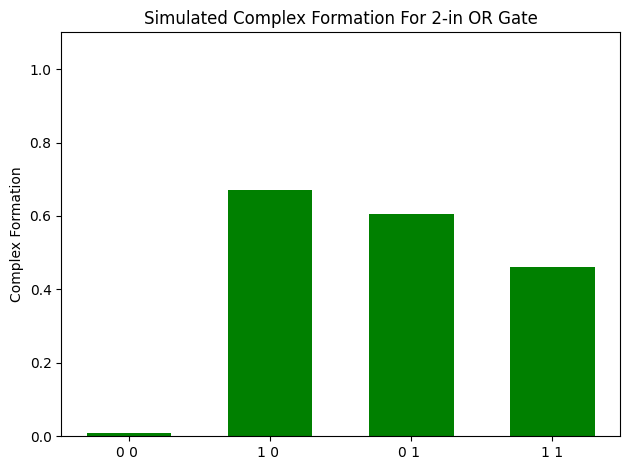

In [ ]:
def OR_rxn1(y, t, parameters):
    k1f = parameters['k_f1']
    k1r = parameters['k_r1']
    AD, DBD, AD_DBD = y
    dADdt = -k1f * AD * DBD + k1r * AD_DBD
    dDBDdt = -k1f * AD * DBD + k1r * AD_DBD
    dAD_DBDdt = k1f * AD * DBD - k1r * AD_DBD
    return [dADdt, dDBDdt, dAD_DBDdt]

def OR_rxn2(y, t, parameters):
    k2f = parameters['k_f2']
    k2r = parameters['k_r2']
    AD, DBD, A, AD_L_DBD = y
    dADdt = -k2f * AD * DBD*A + k2r * AD_L_DBD
    dDBDdt = -k2f * AD * DBD*A + k2r * AD_L_DBD
    dAdt = -k2f * AD * DBD*A + k2r * AD_L_DBD
    dDAD_L_DBDdt = k2f * AD * DBD*A - k2r * AD_L_DBD
    return [dADdt, dDBDdt, dAdt, dDAD_L_DBDdt]

def OR_rxn3(y, t, parameters):
    k3f = parameters['k_f3']
    k3r = parameters['k_r3']
    AD, DBD, B, AD_L_DBD = y
    dADdt = -k3f * AD * DBD * B + k3r * AD_L_DBD
    dDBDdt = -k3f * AD * DBD * B + k3r * AD_L_DBD
    dI2dt = -k3f * AD * DBD * B + k3r * AD_L_DBD
    dAD_L_DBDdt = k3f * AD * DBD * B - k3r * AD_L_DBD
    return [dADdt, dDBDdt, dI2dt, dAD_L_DBDdt]

def OR_rxn4(y, t, parameters):
    k4f = parameters['k_f4']
    k4r = parameters['k_r4']
    AD, DBD, A,B, DBD_L_AD_L_DBD = y
    dADdt = -k4f * AD * DBD * A * B + k4r * DBD_L_AD_L_DBD
    dDBDdt = -k4f * AD * DBD * A * B + k4r * DBD_L_AD_L_DBD
    dAdt = -k4f * AD * DBD * A * B + k4r * DBD_L_AD_L_DBD
    dBdt = -k4f * AD * DBD * A * B + k4r * DBD_L_AD_L_DBD
    dDBD_L_AD_L_DBDdt = k4f * AD * DBD * A * B - k4r * DBD_L_AD_L_DBD
    return [dADdt, dDBDdt, dAdt, dBdt, dDBD_L_AD_L_DBDdt]

k_base_f = 1e5  # Base forward rate constant
k_base_r = 1e-9 # Base reverse rate constant

parameters = {
    'k_f1': k_base_f * 0.000008,  'k_r1': k_base_r,
    'k_f2': k_base_f * 0.0041,  'k_r2': k_base_r,
    'k_f3': k_base_f * .0027,  'k_r3': k_base_r,
    'k_f4': k_base_f * 0.0018,  'k_r4': k_base_r,
}

# Time points for the simulation
t = np.linspace(0, 1e-2, 100)

# Initial conditions for AD and DBD
AD_initial = 1
DBD_initial = 1

# Define function to solve the ODE for each condition and extract the value of the complex at the end
def simulate_condition(initial_conditions, reaction_function, parameters, t):

    solution = odeint(reaction_function, initial_conditions, t, args=(parameters,))
    # Depending on the specific reaction, extract the value of the correct complex
    if reaction_function == OR_rxn1:
      complex_value = solution[-1, 2] # AD_DBD
    elif reaction_function == OR_rxn2:
        complex_value = solution[-1, 3] # AD_L_DBD
    elif reaction_function == OR_rxn3:
         complex_value = solution[-1, 3] # AD_L_DBD
    elif reaction_function == OR_rxn4:
        complex_value = solution[-1, 4] # DBD-L-AD-L-DBD
    return complex_value

# Run simulations for all scenarios and collect results
results = []
# Scenario 1: AD + DBD ⇌ AD_DBD (0,0,0)
initial_conditions_1 = [AD_initial, DBD_initial, 0] # AD, DBD, AD_DBD
results.append(simulate_condition(initial_conditions_1, OR_rxn1, parameters, t))

# Scenario 2:
initial_conditions_2 = [AD_initial, DBD_initial, 1, 0] # AD, DBD, A, AD_L_DBD
results.append(simulate_condition(initial_conditions_2, OR_rxn2, parameters, t))

# Scenario 3:
initial_conditions_3 = [AD_initial, DBD_initial, 1, 0] # AD, DBD, B, AD_L_DBD
results.append(simulate_condition(initial_conditions_3, OR_rxn3, parameters, t))

# Scenario 4:
initial_conditions_4 = [AD_initial, DBD_initial, 1,1, 0]  # AD, DBD, A,B, AD_L_DBD
results.append(simulate_condition(initial_conditions_4, OR_rxn4, parameters, t))

# Plotting
x_labels = ['0 0 ', '1 0 ', '0 1 ', '1 1']
x = np.arange(len(x_labels))
width = 0.6

fig, ax = plt.subplots()
rects = ax.bar(x, results, width, label='Simulated Growth', color='green')
ax.set_ylabel('Complex Formation')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, 1.1)
plt.title("Simulated Complex Formation For 2-in OR Gate")
fig.tight_layout()
plt.show()

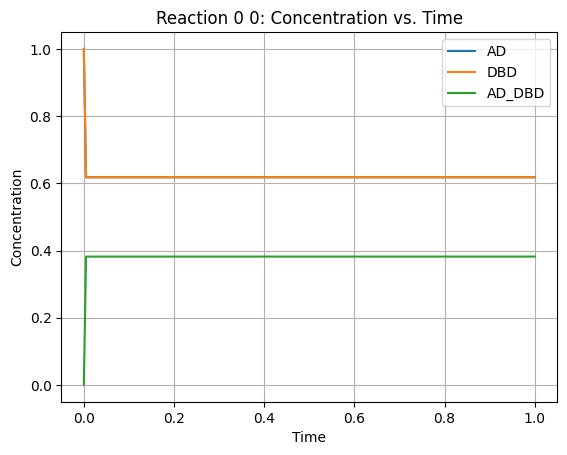

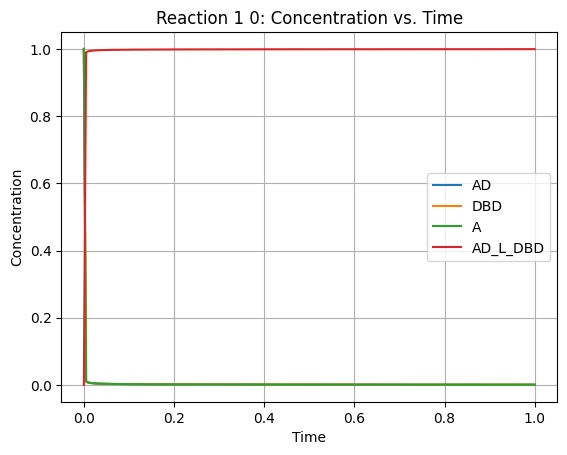

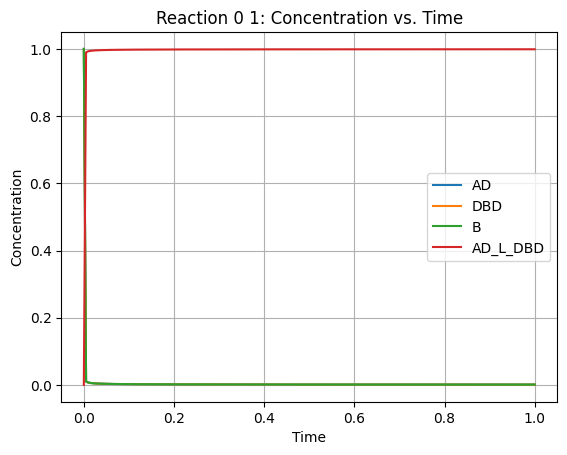

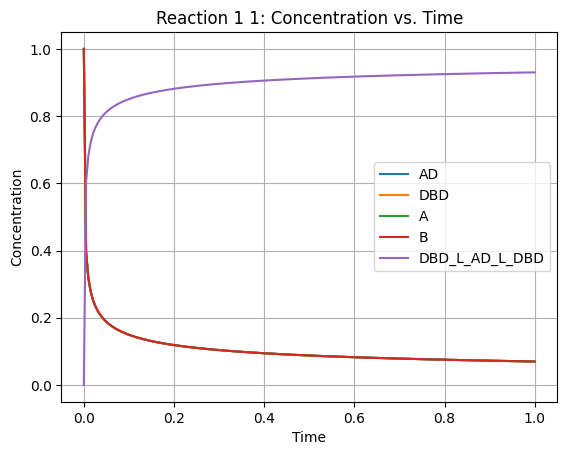

In [ ]:
def simulate_and_plot(reaction_function, initial_conditions, parameters, t, label):
    sol = odeint(reaction_function, initial_conditions, t, args=(parameters,))
    plt.figure()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title(f"Reaction {label}: Concentration vs. Time")

    if reaction_function == OR_rxn1:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='AD_DBD')
    elif reaction_function == OR_rxn2:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='A')
        plt.plot(t, sol[:, 3], label='AD_L_DBD')
    elif reaction_function == OR_rxn3:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='B')
        plt.plot(t, sol[:, 3], label='AD_L_DBD')
    elif reaction_function == OR_rxn4:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='A')
        plt.plot(t, sol[:, 3], label='B')
        plt.plot(t, sol[:, 4], label='DBD_L_AD_L_DBD')

    plt.legend()
    plt.grid(True)
    plt.show()

# Time points for the simulation
t = np.linspace(0, 1, 200)

# Initial conditions for AD and DBD
AD_initial = 1
DBD_initial = 1
AD_DBD_initial = 0

# Run simulations for all scenarios and generate plots
x_labels = ['0 0', '1 0', '0 1', '1 1']
reactions = [OR_rxn1, OR_rxn2, OR_rxn3, OR_rxn4]

# Parameter sets for each reaction
parameters_list = [
    {'k_f1': 1e4, 'k_r1': 1e4 },
    {'k_f1': 1e-4, 'k_r1': 1e4, 'k_f2': 1e6, 'k_r2': 1e-6},
    {'k_f1': 1e-4, 'k_r1': 1e4, 'k_f3': 1e6, 'k_r3': 1e-3},
    {'k_f1': 1e4, 'k_f2': 1e3, 'k_r2': 1e-3, 'k_f4': 1e3, 'k_r4':1e-3}
]
initial_conditions = [
    [AD_initial, DBD_initial, AD_DBD_initial],
    [AD_initial, DBD_initial, 1, 0],
    [AD_initial, DBD_initial, 1, 0],
    [AD_initial, DBD_initial, 1, 1, 0]
]

for i, (reaction_func, initial_cond, label, params) in enumerate(zip(reactions, initial_conditions, x_labels, parameters_list)):
    simulate_and_plot(reaction_func, initial_cond, params, t, label)

# 2-input NOT gate





AD_DBD + 2I ⇌ ADI + DBDI

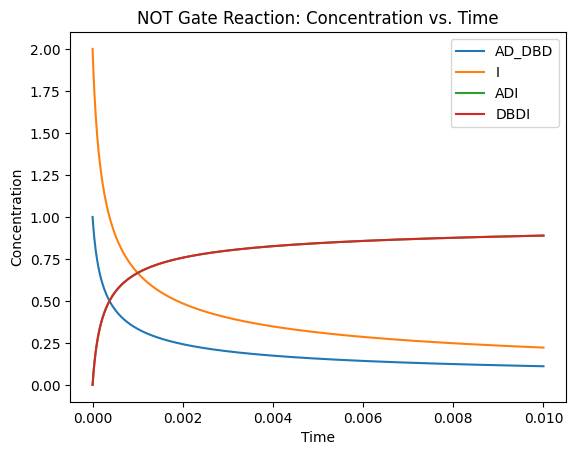

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Reaction 2: AD_DBD + 2I ⇌ ADI + DBDI
def reaction2(y, t, k_f2, k_r2):
    AD_DBD, I, ADI, DBDI = y

  #  dADdt = -k_f2 * AD * DBD * I**2 + k_r2 * ADI * DBDI
    dAD_DBDdt = -k_f2 * AD_DBD * I**2 + k_r2 * ADI * DBDI
    dIdt = -2 * k_f2 * AD_DBD * I**2 + 2 * k_r2 * ADI * DBDI
    dADIdt = k_f2 * AD_DBD * I**2 - k_r2 * ADI * DBDI
    dDBDIdt = k_f2 * AD_DBD * I**2 - k_r2 * ADI * DBDI
    return [dAD_DBDdt, dIdt, dADIdt, dDBDIdt]


# Time points for simulation
t = np.linspace(0, 0.01, 1000)

# Initial conditions
AD_DBD_initial = 1
I_initial = 2
ADI_initial = 0
DBDI_initial = 0

initial_conditions = [AD_DBD_initial, I_initial, ADI_initial, DBDI_initial]

# Parameters
k_f2 = 1e3 # Example forward rate
k_r2 = 1e-3  # Example reverse rate

#Solve ODE
solution = odeint(reaction2, initial_conditions, t, args=(k_f2,k_r2))


# Plot
plt.figure()
plt.plot(t, solution[:, 0], label='AD_DBD')
plt.plot(t, solution[:, 1], label='I')
plt.plot(t, solution[:, 2], label='ADI')
plt.plot(t, solution[:, 3], label='DBDI')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("NOT Gate Reaction: Concentration vs. Time")
plt.legend()
plt.show()

# 2-input NOR gate

AD + DBD ⇌ AD_DBD

AD_DBD + B ⇌ AD + DBD_B

AD_DBD + Y ⇌ AD_Y + DBD

AD_DBD + B + Y ⇌ AD_Y + DBD_B

In [ ]:
# Reaction 1: AD + DBD ⇌ AD_DBD
def NORreaction1(y, t, k1f, k1r):
  AD, DBD, AD_DBD = y
  dADdt = -k1f * AD * DBD + k1r * AD_DBD
  dDBDdt = -k1f * AD * DBD + k1r * AD_DBD
  dAD_DBDdt = k1f * AD * DBD - k1r * AD_DBD
  return [dADdt, dDBDdt, dAD_DBDdt]

# Reaction 2: AD_DBD + B ⇌ AD + DBD_B
def NORreaction2(y, t, k2f, k2r):
  AD_DBD, B, AD, DBD_B = y
  dAD_DBDdt = -k2f * AD_DBD * B + k2r * AD * DBD_B
  dBdt = -k2f * AD_DBD * B + k2r * AD * DBD_B
  dADdt = -k2r * AD * DBD_B + k2f * AD_DBD * B
  dDBD_Bdt = -k2r * AD * DBD_B + k2f * AD_DBD * B
  return [dAD_DBDdt, dBdt, dADdt, dDBD_Bdt]

# Reaction 3: AD_DBD + Y ⇌ AD_Y + DBD
def NORreaction3(y, t, k3f, k3r):
  AD_DBD, Y, AD_Y, DBD = y
  dAD_DBDdt = -k3f * AD_DBD + k3r * AD_Y * DBD
  dYdt = -k3f * AD_DBD + k3r * AD_Y * DBD
  dAD_Ydt = -k3r * AD_Y * DBD + k3f * AD_DBD
  dDBDdt = -k3r * AD_Y * DBD + k3f * AD_DBD
  return [dAD_DBDdt, dYdt, dAD_Ydt, dDBDdt]

# Reaction 4: AD_DBD + B + Y ⇌ AD_Y + DBD_B
def NORreaction4(y, t, k4f, k4r):
  AD_DBD, B, Y, AD_Y, DBD_B = y
  dAD_DBDdt = -k4f * AD_DBD * B * Y + k4r * AD_Y * DBD_B
  dBdt = -k4f * AD_DBD * B * Y + k4r * AD_Y * DBD_B
  dYdt = -k4f * AD_DBD * B * Y + k4r * AD_Y * DBD_B
  dAD_Ydt = -k4r * AD_Y * DBD_B + k4f * AD_DBD * B * Y
  dDBD_Bdt = -k4r * AD_Y * DBD_B + k4f * AD_DBD * B * Y
  return [dAD_DBDdt, dBdt, dYdt, dAD_Ydt, dDBD_Bdt]

# 2-input XNOR gate

AD_DBD  ⇌ AD_DBD

AD_DBD + I1 ⇌ AD + DBD_I1

AD_DBD + I2 ⇌ AD_I2 + DBD

AD_DBD + I1 + I2 ⇌ AD_DBD + I1_I2

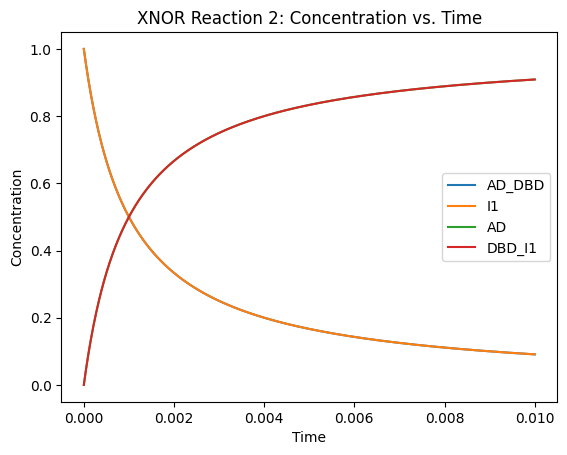

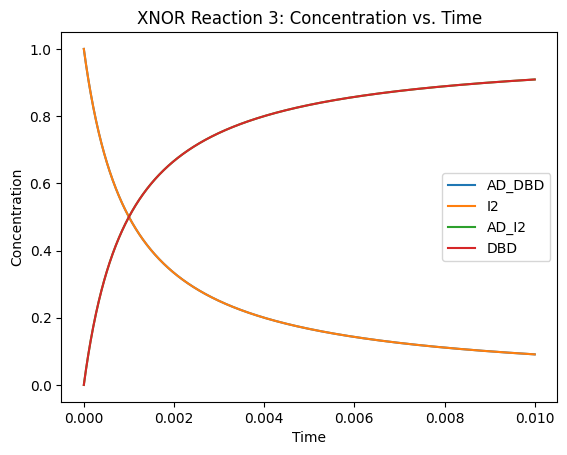

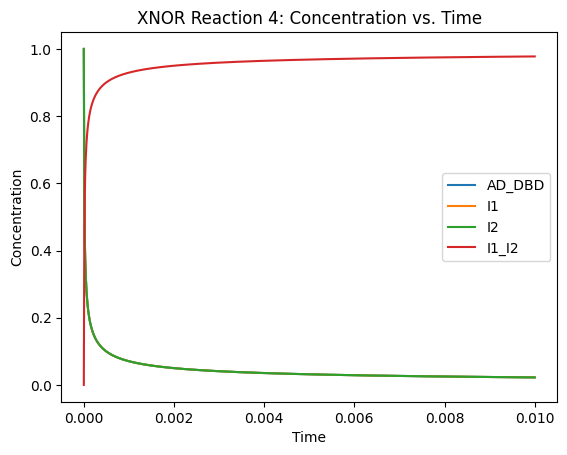

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equations for each reaction scenario
def XNOR_rxn2(y, t, k_f2, k_r2):
   # AD_DBD + I1 <=> AD + DBD_I1
    AD_DBD, I1, AD, DBD_I1 = y

    dAD_DBDdt = -k_f2 * AD_DBD * I1 + k_r2 * AD * DBD_I1
    dI1dt = -k_f2 * AD_DBD * I1 + k_r2 * AD * DBD_I1
    dADdt = k_f2 * AD_DBD * I1 - k_r2 * AD * DBD_I1
    dDBD_I1dt = k_f2 * AD_DBD * I1 - k_r2 * AD * DBD_I1

    return [dAD_DBDdt, dI1dt, dADdt, dDBD_I1dt]

def XNOR_rxn3(y, t, k_f3, k_r3):

    # AD_DBD + I2 <=> AD_I2 + DBD

    AD_DBD, I2, AD_I2, DBD = y

    dAD_DBDdt = -k_f3 * AD_DBD * I2 + k_r3 * AD_I2 * DBD
    dI2dt = -k_f3 * AD_DBD * I2 + k_r3 * AD_I2 * DBD
    dAD_I2dt = k_f3 * AD_DBD * I2 - k_r3 * AD_I2 * DBD
    dDBDdt = k_f3 * AD_DBD * I2 - k_r3 * AD_I2 * DBD

    return [dAD_DBDdt, dI2dt, dAD_I2dt, dDBDdt]

def XNOR_rxn4(y, t, k_f4, k_r4):

     # AD_DBD + I1 + I2 <=> AD_DBD + I1_I2

    AD_DBD, I1, I2, I1_I2 = y

    dAD_DBDdt = -k_f4 * AD_DBD * I1 * I2 + k_r4 * AD_DBD * I1_I2
    dI1dt = -k_f4 * AD_DBD * I1 * I2 + k_r4 * AD_DBD * I1_I2
    dI2dt = -k_f4 * AD_DBD * I1 * I2 + k_r4 * AD_DBD * I1_I2
    dI1_I2dt = k_f4 * AD_DBD * I1 * I2 - k_r4 * AD_DBD * I1_I2
    return [dAD_DBDdt, dI1dt, dI2dt, dI1_I2dt]


# Time points for simulation
t = np.linspace(0,0.01, 1000)

# Initial conditions for AD and DBD
AD_DBD_initial = 1
I1_initial = 1
I2_initial = 1
AD_initial = 0
DBD_I1_initial = 0
AD_I2_initial = 0
DBD_initial = 0
I1_I2_initial = 0


# --- Reaction 2 ---
# Parameters
k_f2 = 1e3
k_r2 = 1e-3
# Initial Conditions
initial_conditions_XNOR_rxn2 = [AD_DBD_initial, I1_initial, AD_initial, DBD_I1_initial]
# Solve ODE
solution_XNOR_rxn2 = odeint(XNOR_rxn2, initial_conditions_XNOR_rxn2, t, args=(k_f2, k_r2))
# Plot
plt.figure()
plt.plot(t, solution_XNOR_rxn2[:, 0], label='AD_DBD')
plt.plot(t, solution_XNOR_rxn2[:, 1], label='I1')
plt.plot(t, solution_XNOR_rxn2[:, 2], label='AD')
plt.plot(t, solution_XNOR_rxn2[:, 3], label='DBD_I1')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("XNOR Reaction 2: Concentration vs. Time")
plt.legend()
plt.show()


# --- Reaction 3 ---
# Parameters
k_f3 = 1e3
k_r3 = 1e-3
# Initial Conditions
initial_conditions_XNOR_rxn3 = [AD_DBD_initial, I2_initial, AD_I2_initial, DBD_initial]
# Solve ODE
solution_XNOR_rxn3 = odeint(XNOR_rxn3, initial_conditions_XNOR_rxn3, t, args=(k_f3, k_r3))
# Plot
plt.figure()
plt.plot(t, solution_XNOR_rxn3[:, 0], label='AD_DBD')
plt.plot(t, solution_XNOR_rxn3[:, 1], label='I2')
plt.plot(t, solution_XNOR_rxn3[:, 2], label='AD_I2')
plt.plot(t, solution_XNOR_rxn3[:, 3], label='DBD')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("XNOR Reaction 3: Concentration vs. Time")
plt.legend()
plt.show()

# --- Reaction 4 ---
# Parameters
k_f4 = 1e5
k_r4 = 1e-4
# Initial Conditions
initial_conditions_XNOR_rxn4 = [AD_DBD_initial, I1_initial, I2_initial, I1_I2_initial]
# Solve ODE
solution_XNOR_rxn4 = odeint(XNOR_rxn4, initial_conditions_XNOR_rxn4, t, args=(k_f4, k_r4))
# Plot
plt.figure()
plt.plot(t, solution_XNOR_rxn4[:, 0], label='AD_DBD')
plt.plot(t, solution_XNOR_rxn4[:, 1], label='I1')
plt.plot(t, solution_XNOR_rxn4[:, 2], label='I2')
plt.plot(t, solution_XNOR_rxn4[:, 3], label='I1_I2')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("XNOR Reaction 4: Concentration vs. Time")
plt.legend()
plt.show()

# 2-input NAND gate

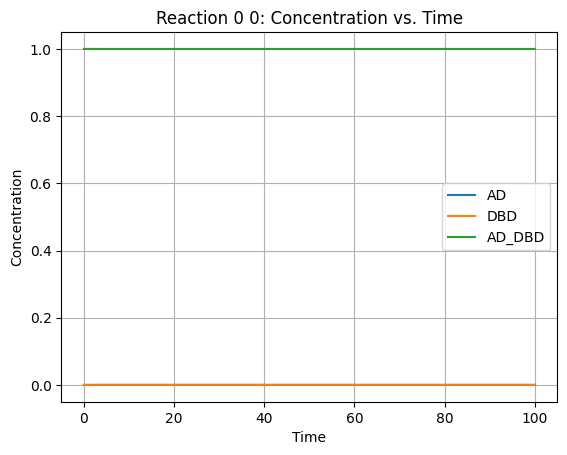

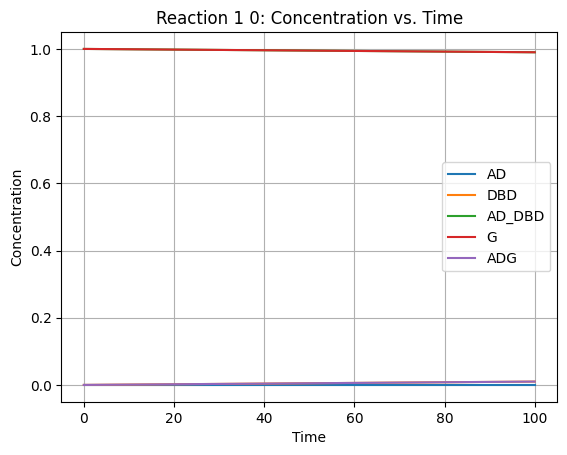

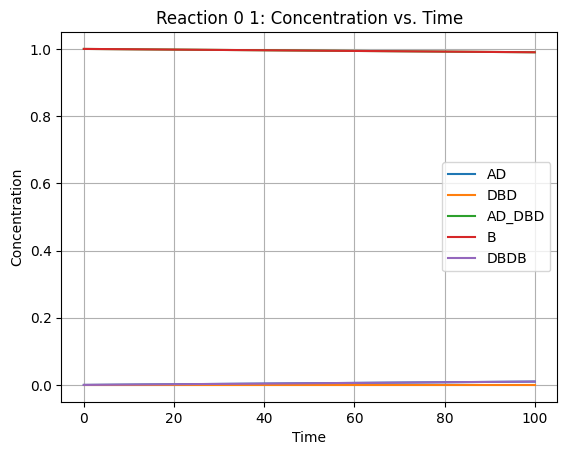

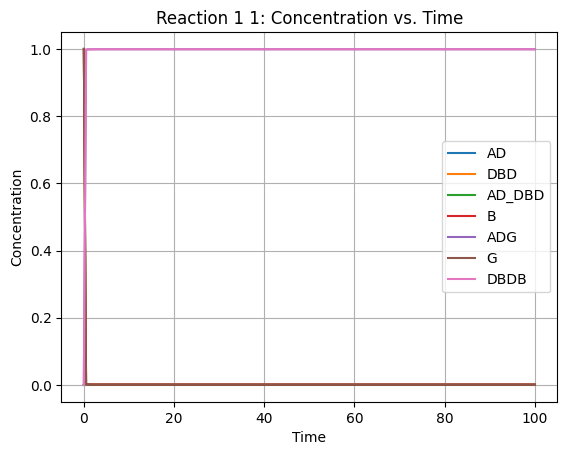

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
#ADDBD ⇌ AD + DBD 0 0
def reaction1(y, t, k1f, k1r):
    AD, DBD, AD_DBD = y
    dADdt = -k1r * AD * DBD + k1f * AD_DBD
    dDBDdt = -k1r * AD * DBD + k1f * AD_DBD
    dAD_DBDdt = k1r * AD * DBD - k1f * AD_DBD
    return [dADdt, dDBDdt, dAD_DBDdt]
# ADDBD ⇌ AD + DBD
# AD + G ⇌ ADG 1 0
def reaction2(y, t, k1f, k1r, k2f, k2r):
    AD, DBD, AD_DBD, G, ADG = y
    dADdt = -k1r * AD * DBD + k1f * AD_DBD - k2f*AD*G+k2r*ADG
    dDBDdt = -k1r * AD * DBD + k1f * AD_DBD
    dGdt =  - k2f*AD*G+k2r*ADG
    dAD_DBDdt = k1r * AD * DBD - k1f * AD_DBD
    dADGdt  =  k2f*AD*G - k2r*ADG
    return [dADdt, dDBDdt, dAD_DBDdt, dGdt, dADGdt]
# ADDBD ⇌ AD + DBD
# DBD + B ⇌ DBDB
def reaction3(y, t, k1f, k1r, k2f, k2r):
  AD, DBD, AD_DBD, B, DBDB = y
  dADdt = -k1r * AD * DBD + k1f * AD_DBD
  dDBDdt = -k1r * AD * DBD + k1f * AD_DBD - k2f*DBD*B + k2r*DBDB
  dBdt =  - k2f*DBD*B + k2r*DBDB
  dAD_DBDdt = k1r * AD * DBD - k1f * AD_DBD
  dDBDBdt  =  k2f*DBD*B - k2r*DBDB
  return [dADdt, dDBDdt, dAD_DBDdt, dBdt, dDBDBdt]

# ADDBD = AD + DBD
# AD + G ⇌ ADG
# DBD + B ⇌ DBDB

def reaction4(y, t, k1f, k2f, k2r, k3f, k3r):
  AD, DBD, AD_DBD, B, ADG, G, DBDB = y
  dADdt = -k2f*AD*G+k2r*ADG+k1f*AD_DBD
  dDBDdt = -k3f * DBD *B + k3r*DBDB + k1f*AD_DBD
  dBdt = -k3f * DBD *B + k3r*DBDB
  dGdt =  -k2f*AD*G+k2r*ADG
  dAD_DBDdt = - k1f * AD_DBD
  dADGdt  =  k2f*AD*G-k2r*ADG
  dDBDBdt  =  k3f * DBD *B - k3r*DBDB
  return [dADdt, dDBDdt, dAD_DBDdt, dBdt, dADGdt, dGdt, dDBDBdt]

# Define function to solve the ODE and plot the results for each reaction
def simulate_and_plot(reaction_function, initial_conditions, parameters, t, label):
    sol = odeint(reaction_function, initial_conditions, t, args=tuple(parameters.values())) # Modified line
    plt.figure()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title(f"Reaction {label}: Concentration vs. Time")

    if reaction_function == reaction1:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='AD_DBD')
    elif reaction_function == reaction2:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='AD_DBD')
        plt.plot(t, sol[:, 3], label='G')
        plt.plot(t, sol[:, 4], label='ADG')
    elif reaction_function == reaction3:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='AD_DBD')
        plt.plot(t, sol[:, 3], label='B')
        plt.plot(t, sol[:, 4], label='DBDB')
    elif reaction_function == reaction4:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='AD_DBD')
        plt.plot(t, sol[:, 3], label='B')
        plt.plot(t, sol[:, 4], label='ADG')
        plt.plot(t, sol[:, 5], label='G')
        plt.plot(t, sol[:, 6], label='DBDB')

    plt.legend()
    plt.grid(True)
    plt.show()

# Time points for the simulation
t = np.linspace(0, 100, 200)
# Initial conditions for AD and DBD
AD_initial = 0
DBD_initial = 0
AD_DBD_initial = 1 # all of the AD and DBD is bound in the beginning


# Run simulations for all scenarios and generate plots
x_labels = ['0 0', '1 0', '0 1', '1 1']
reactions = [reaction1, reaction2, reaction3, reaction4]

# Parameter sets for each reaction
parameters_list = [
    {'k1f': 1e-4, 'k1r': 1e4 }, # reaction 1 no change
    {'k1f': 1e-4, 'k1r': 1e4, 'k2f': 1e6, 'k2r': 1e-6},
    {'k1f': 1e-4, 'k1r': 1e4, 'k2f': 1e6, 'k2r': 1e-3},
    {'k1f': 1e4, 'k2f': 1e3, 'k2r': 1e-3, 'k3f': 1e3, 'k3r':1e-3}
]
initial_conditions = [
    [AD_initial, DBD_initial, AD_DBD_initial],
    [AD_initial, DBD_initial, AD_DBD_initial, 1, 0], # Initial G at 1
    [AD_initial, DBD_initial, AD_DBD_initial, 1, 0], # Initial B at 1
    [AD_initial, DBD_initial, AD_DBD_initial, 1, 0, 1, 0] # Initial B, G at 1
]
for i, (reaction_func, initial_cond, label, params) in enumerate(zip(reactions, initial_conditions, x_labels, parameters_list)):
    simulate_and_plot(reaction_func, initial_cond, params, t, label)

# 3-input AND gate

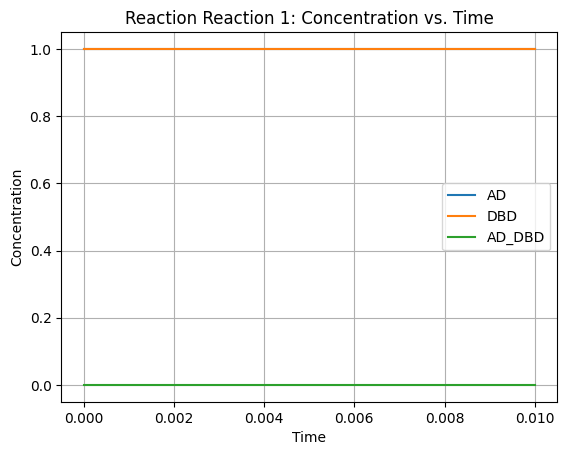

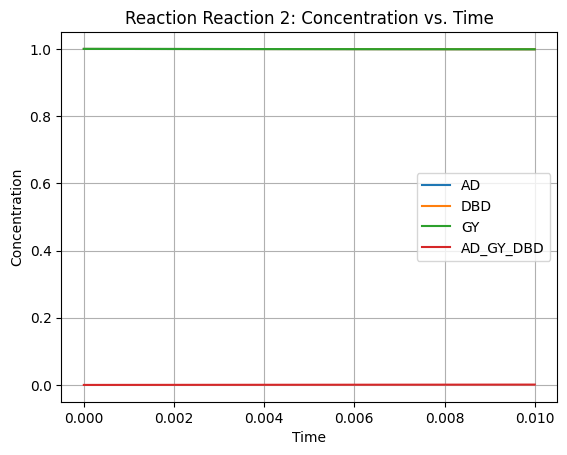

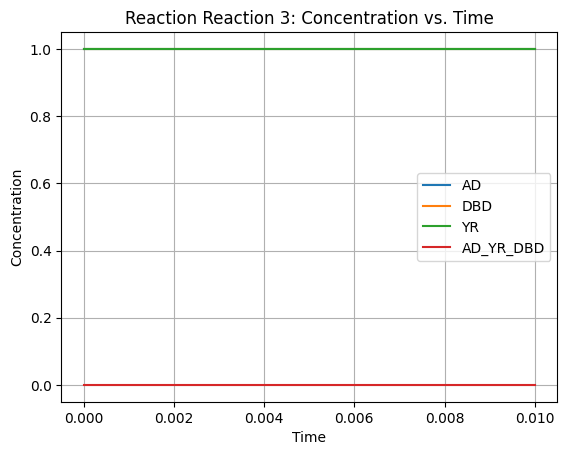

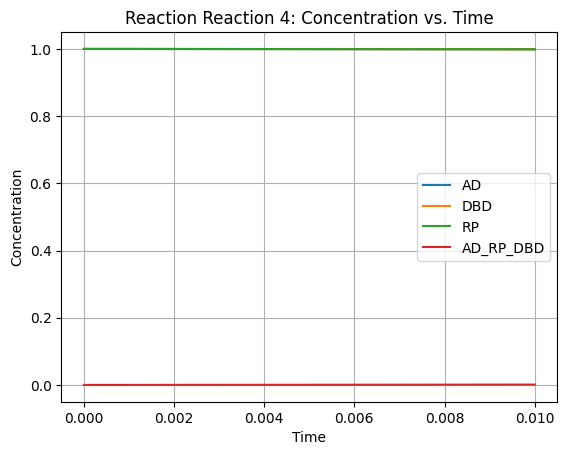

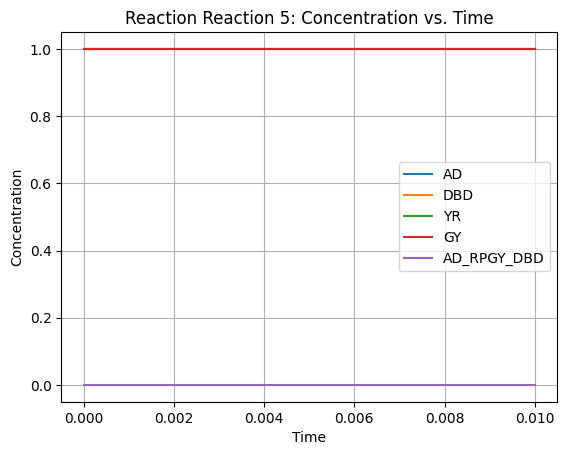

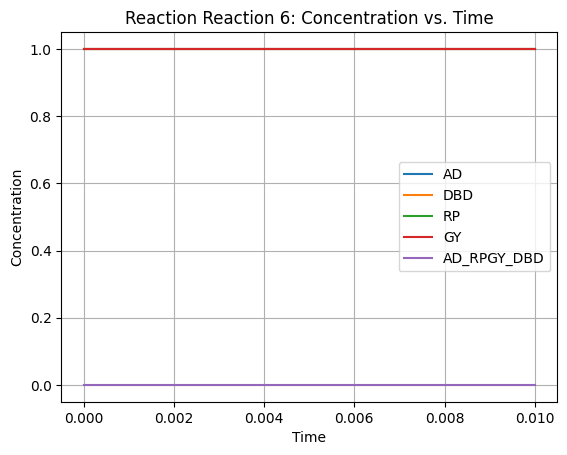

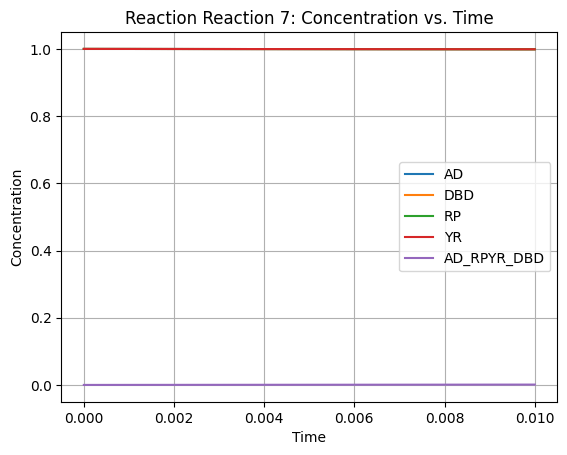

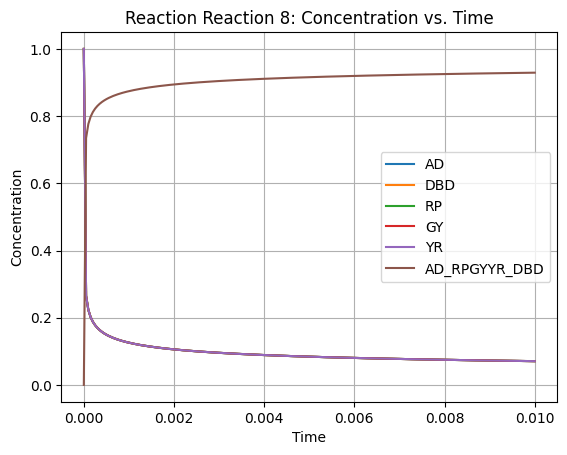

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equations for each reaction scenario

#AD+DBD ⇌ ADDBD
def reaction1(y, t, k1f, k1r):
  AD, DBD, AD_DBD = y
  dADdt = -k1f * AD * DBD + k1r * AD_DBD
  dDBDdt = -k1f * AD * DBD + k1r * AD_DBD
  dAD_DBDdt = k1f * AD * DBD - k1r * AD_DBD
  return [dADdt, dDBDdt, dAD_DBDdt]
#AD+DBD+GY ⇌ AD_GY_DBD + - -
def reaction2(y, t, k1f, k1r):
  AD, DBD, GY, AD_GY_DBD = y
  dADdt = -k1f*AD*DBD*GY+k1r*AD_GY_DBD
  dDBDdt = -k1f*AD*DBD*GY+k1r*AD_GY_DBD
  dGYdt = -k1f*AD*DBD*GY+k1r*AD_GY_DBD
  dAD_GY_DBDdt = k1f*AD*DBD*GY-k1r*AD_GY_DBD
  return [dADdt, dDBDdt, dGYdt, dAD_GY_DBDdt]
#AD+DBD+YR ⇌ AD_GY_DBD - + -
def reaction3(y, t, k1f, k1r):
  AD, DBD, YR, AD_YR_DBD = y
  dADdt = -k1f*AD*DBD*YR+k1r*AD_YR_DBD
  dDBDdt = -k1f*AD*DBD*YR+k1r*AD_YR_DBD
  dYRdt = -k1f*AD*DBD*YR+k1r*AD_YR_DBD
  dAD_YR_DBDdt = k1f*AD*DBD*YR-k1r*AD_YR_DBD
  return [dADdt, dDBDdt, dYRdt, dAD_YR_DBDdt]
#AD+DBD+ RP ⇌ AD_RP_DBD - - +
def reaction4(y, t, k1f, k1r):
  AD, DBD, RP, AD_RP_DBD = y
  dADdt = -k1f*AD*DBD*RP+k1r*AD_RP_DBD
  dDBDdt = -k1f*AD*DBD*RP+k1r*AD_RP_DBD
  dRPdt = -k1f*AD*DBD*RP+k1r*AD_RP_DBD
  dAD_RP_DBDdt = k1f*AD*DBD*RP-k1r*AD_RP_DBD
  return [dADdt, dDBDdt, dRPdt, dAD_RP_DBDdt]

#AD+DBD+ YR+ GY ⇌ AD_RPGY_DBD + + -
def reaction5(y, t, k1f, k1r):
  AD, DBD, YR, GY, AD_RPGY_DBD = y
  dADdt = -k1f*AD*DBD*YR*GY+k1r*AD_RPGY_DBD
  dDBDdt = -k1f*AD*DBD*YR*GY+k1r*AD_RPGY_DBD
  dGYdt = -k1f*AD*DBD*YR*GY+k1r*AD_RPGY_DBD
  dYRdt = -k1f*AD*DBD*YR*GY+k1r*AD_RPGY_DBD
  dAD_RPGY_DBDdt = k1f*AD*DBD*YR*GY-k1r*AD_RPGY_DBD
  return [dADdt, dDBDdt, dYRdt, dGYdt, dAD_RPGY_DBDdt]

#AD+DBD+ RP+ GY ⇌ AD_RPGY_DBD + - +
def reaction6(y, t, k1f, k1r):
  AD, DBD, RP, GY, AD_RPGY_DBD = y
  dADdt = -k1f*AD*DBD*RP*GY+k1r*AD_RPGY_DBD
  dDBDdt = -k1f*AD*DBD*RP*GY+k1r*AD_RPGY_DBD
  dGYdt = -k1f*AD*DBD*RP*GY+k1r*AD_RPGY_DBD
  dRPdt = -k1f*AD*DBD*RP*GY+k1r*AD_RPGY_DBD
  dAD_RPGY_DBDdt = k1f*AD*DBD*RP*GY-k1r*AD_RPGY_DBD
  return [dADdt, dDBDdt, dRPdt, dGYdt, dAD_RPGY_DBDdt]

#AD+DBD+ RP+ YR ⇌ AD_RPYR_DBD - + +
def reaction7(y, t, k1f, k1r):
  AD, DBD, RP, YR, AD_RPYR_DBD = y
  dADdt = -k1f*AD*DBD*RP*YR+k1r*AD_RPYR_DBD
  dDBDdt = -k1f*AD*DBD*RP*YR+k1r*AD_RPYR_DBD
  dYRdt = -k1f*AD*DBD*RP*YR+k1r*AD_RPYR_DBD
  dRPdt = -k1f*AD*DBD*RP*YR+k1r*AD_RPYR_DBD
  dAD_RPRY_DBDdt = k1f*AD*DBD*RP*YR-k1r*AD_RPYR_DBD
  return [dADdt, dDBDdt, dRPdt, dYRdt, dAD_RPRY_DBDdt]

#AD+DBD+ RP+ GY + YR ⇌ AD_RPGY_DBD + + +
def reaction8(y, t, k1f, k1r):
  AD, DBD, RP, GY, YR, AD_RPGYYR_DBD = y
  dADdt = -k1f*AD*DBD*RP*GY*YR+k1r*AD_RPGYYR_DBD
  dDBDdt = -k1f*AD*DBD*RP*GY*YR+k1r*AD_RPGYYR_DBD
  dGYdt = -k1f*AD*DBD*RP*GY*YR+k1r*AD_RPGYYR_DBD
  dRPdt = -k1f*AD*DBD*RP*GY*YR+k1r*AD_RPGYYR_DBD
  dYRdt = -k1f*AD*DBD*RP*GY*YR+k1r*AD_RPGYYR_DBD
  dAD_RPGYYR_DBDdt = k1f*AD*DBD*RP*GY*YR-k1r*AD_RPGYYR_DBD
  return [dADdt, dDBDdt, dRPdt, dGYdt, dYRdt, dAD_RPGYYR_DBDdt]



# Define function to solve the ODE and plot the results for each reaction
def simulate_and_plot(reaction_function, initial_conditions, parameters, t, label):
    sol = odeint(reaction_function, initial_conditions, t, args=tuple(parameters.values()))
    plt.figure()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title(f"Reaction {label}: Concentration vs. Time")

    if reaction_function == reaction1:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='AD_DBD')
    elif reaction_function == reaction2:
      plt.plot(t, sol[:, 0], label='AD')
      plt.plot(t, sol[:, 1], label='DBD')
      plt.plot(t, sol[:, 2], label='GY')
      plt.plot(t, sol[:, 3], label='AD_GY_DBD')
    elif reaction_function == reaction3:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='YR')
        plt.plot(t, sol[:, 3], label='AD_YR_DBD')
    elif reaction_function == reaction4:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='RP')
        plt.plot(t, sol[:, 3], label='AD_RP_DBD')
    elif reaction_function == reaction5:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='YR')
        plt.plot(t, sol[:, 3], label='GY')
        plt.plot(t, sol[:, 4], label='AD_RPGY_DBD')
    elif reaction_function == reaction6:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='RP')
        plt.plot(t, sol[:, 3], label='GY')
        plt.plot(t, sol[:, 4], label='AD_RPGY_DBD')
    elif reaction_function == reaction7:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='RP')
        plt.plot(t, sol[:, 3], label='YR')
        plt.plot(t, sol[:, 4], label='AD_RPYR_DBD')
    elif reaction_function == reaction8:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='RP')
        plt.plot(t, sol[:, 3], label='GY')
        plt.plot(t, sol[:, 4], label='YR')
        plt.plot(t, sol[:, 5], label='AD_RPGYYR_DBD')

    plt.legend()
    plt.grid(True)
    plt.show()

# Time points for the simulation
t = np.linspace(0, 0.01, 200)

# Initial conditions for AD and DBD
AD_initial = 1
DBD_initial = 1
AD_DBD_initial = 0 # all of the AD and DBD is unbound in the beginning
GY_initial = 1
YR_initial = 1
RP_initial = 1

# Run simulations for all scenarios and generate plots
x_labels = ['Reaction 1', 'Reaction 2', 'Reaction 3', 'Reaction 4', 'Reaction 5', 'Reaction 6', 'Reaction 7', 'Reaction 8']
reactions = [reaction1, reaction2, reaction3, reaction4, reaction5, reaction6, reaction7, reaction8]
# Parameter sets for each reaction
parameters_list = [
    {'k1f': 1e-4, 'k1r': 1e-4 },
    {'k1f': 1e-1, 'k1r': 1e-2},
    {'k1f': 1e-4 , 'k1r': 1e-4},
    {'k1f': 1e-1, 'k1r': 1e-3},
    {'k1f': 1e-4, 'k1r': 1e-4},
    {'k1f': 1e-4, 'k1r': 1e-4},
    {'k1f': 1e-1, 'k1r': 1e-3},
    {'k1f': 1e6, 'k1r': 1e-4},
]


initial_conditions = [
    [AD_initial, DBD_initial, AD_DBD_initial],
    [AD_initial, DBD_initial, GY_initial, 0],
    [AD_initial, DBD_initial, YR_initial, 0],
    [AD_initial, DBD_initial, RP_initial, 0],
    [AD_initial, DBD_initial, YR_initial, GY_initial, 0],
    [AD_initial, DBD_initial, RP_initial, GY_initial, 0],
    [AD_initial, DBD_initial, RP_initial, YR_initial, 0],
    [AD_initial, DBD_initial, RP_initial, GY_initial, YR_initial, 0],
]
for i, (reaction_func, initial_cond, label, params) in enumerate(zip(reactions, initial_conditions, x_labels, parameters_list)):
    simulate_and_plot(reaction_func, initial_cond, params, t, label)

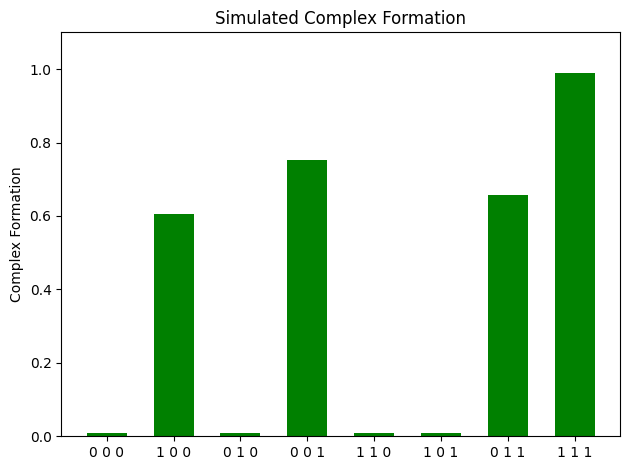

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equations for each reaction scenario
#AD+DBD ⇌ ADDBD
def reaction1(y, t, parameters):
  k1f = parameters['k_f1']
  k1r = parameters['k_r1']
  AD, DBD, AD_DBD = y
  dADdt = -k1f * AD * DBD + k1r * AD_DBD
  dDBDdt = -k1f * AD * DBD + k1r * AD_DBD
  dAD_DBDdt = k1f * AD * DBD - k1r * AD_DBD
  return [dADdt, dDBDdt, dAD_DBDdt]
#AD+DBD+GY ⇌ AD_GY_DBD + - -
def reaction2(y, t, parameters):
  k2f = parameters['k_f2']
  k2r = parameters['k_r2']
  AD, DBD, GY, AD_GY_DBD = y
  dADdt = -k2f*AD*DBD*GY+k2r*AD_GY_DBD
  dDBDdt = -k2f*AD*DBD*GY+k2r*AD_GY_DBD
  dGYdt = -k2f*AD*DBD*GY+k2r*AD_GY_DBD
  dAD_GY_DBDdt = k2f*AD*DBD*GY-k2r*AD_GY_DBD
  return [dADdt, dDBDdt, dGYdt, dAD_GY_DBDdt]
#AD+DBD+YR ⇌ AD_GY_DBD - + -
def reaction3(y, t, parameters):
  k3f = parameters['k_f3']
  k3r = parameters['k_r3']
  AD, DBD, YR, AD_YR_DBD = y
  dADdt = -k3f*AD*DBD*YR+k3r*AD_YR_DBD
  dDBDdt = -k3f*AD*DBD*YR+k3r*AD_YR_DBD
  dYRdt = -k3f*AD*DBD*YR+k3r*AD_YR_DBD
  dAD_YR_DBDdt = k3f*AD*DBD*YR-k3r*AD_YR_DBD
  return [dADdt, dDBDdt, dYRdt, dAD_YR_DBDdt]
#AD+DBD+ RP ⇌ AD_RP_DBD - - +
def reaction4(y, t, parameters):
  k4f = parameters['k_f4']
  k4r = parameters['k_r4']
  AD, DBD, RP, AD_RP_DBD = y
  dADdt = -k4f*AD*DBD*RP+k4r*AD_RP_DBD
  dDBDdt = -k4f*AD*DBD*RP+k4r*AD_RP_DBD
  dRPdt = -k4f*AD*DBD*RP+k4r*AD_RP_DBD
  dAD_RP_DBDdt = k4f*AD*DBD*RP-k4r*AD_RP_DBD
  return [dADdt, dDBDdt, dRPdt, dAD_RP_DBDdt]

#AD+DBD+ YR+ GY ⇌ AD_RPGY_DBD + + -
def reaction5(y, t, parameters):
  k5f = parameters['k_f5']
  k5r = parameters['k_r5']
  AD, DBD, YR, GY, AD_RPGY_DBD = y
  dADdt = -k5f*AD*DBD*YR*GY+k5r*AD_RPGY_DBD
  dDBDdt = -k5f*AD*DBD*YR*GY+k5r*AD_RPGY_DBD
  dGYdt = -k5f*AD*DBD*YR*GY+k5r*AD_RPGY_DBD
  dYRdt = -k5f*AD*DBD*YR*GY+k5r*AD_RPGY_DBD
  dAD_RPGY_DBDdt = k5f*AD*DBD*YR*GY-k5r*AD_RPGY_DBD
  return [dADdt, dDBDdt, dYRdt, dGYdt, dAD_RPGY_DBDdt]

#AD+DBD+ RP+ GY ⇌ AD_RPGY_DBD + - +
def reaction6(y, t, parameters):
  k6f = parameters['k_f6']
  k6r = parameters['k_r6']
  AD, DBD, RP, GY, AD_RPGY_DBD = y
  dADdt = -k6f*AD*DBD*RP*GY+k6r*AD_RPGY_DBD
  dDBDdt = -k6f*AD*DBD*RP*GY+k6r*AD_RPGY_DBD
  dGYdt = -k6f*AD*DBD*RP*GY+k6r*AD_RPGY_DBD
  dRPdt = -k6f*AD*DBD*RP*GY+k6r*AD_RPGY_DBD
  dAD_RPGY_DBDdt = k6f*AD*DBD*RP*GY-k6r*AD_RPGY_DBD
  return [dADdt, dDBDdt, dRPdt, dGYdt, dAD_RPGY_DBDdt]

#AD+DBD+ RP+ YR ⇌ AD_RPYR_DBD - + +
def reaction7(y, t, parameters):
  k7f = parameters['k_f7']
  k7r = parameters['k_r7']
  AD, DBD, RP, YR, AD_RPYR_DBD = y
  dADdt = -k7f*AD*DBD*RP*YR+k7r*AD_RPYR_DBD
  dDBDdt = -k7f*AD*DBD*RP*YR+k7r*AD_RPYR_DBD
  dYRdt = -k7f*AD*DBD*RP*YR+k7r*AD_RPYR_DBD
  dRPdt = -k7f*AD*DBD*RP*YR+k7r*AD_RPYR_DBD
  dAD_RPYR_DBDdt = k7f*AD*DBD*RP*YR-k7r*AD_RPYR_DBD
  return [dADdt, dDBDdt, dRPdt, dYRdt, dAD_RPYR_DBDdt]

#AD+DBD+ RP+ GY + YR ⇌ AD_RPGY_DBD + + +
def reaction8(y, t, parameters):
  k8f = parameters['k_f8']
  k8r = parameters['k_r8']
  AD, DBD, RP, GY, YR, AD_RPGYYR_DBD = y
  dADdt = -k8f*AD*DBD*RP*GY*YR+k8r*AD_RPGYYR_DBD
  dDBDdt = -k8f*AD*DBD*RP*GY*YR+k8r*AD_RPGYYR_DBD
  dGYdt = -k8f*AD*DBD*RP*GY*YR+k8r*AD_RPGYYR_DBD
  dRPdt = -k8f*AD*DBD*RP*GY*YR+k8r*AD_RPGYYR_DBD
  dYRdt = -k8f*AD*DBD*RP*GY*YR+k8r*AD_RPGYYR_DBD
  dAD_RPGYYR_DBDdt = k8f*AD*DBD*RP*GY*YR-k8r*AD_RPGYYR_DBD
  return [dADdt, dDBDdt, dRPdt, dGYdt, dYRdt, dAD_RPGYYR_DBDdt]

parameters = {
    'k_f1': 1e-4, 'k_r1': 1e-4,
    'k_f2': 1e-1, 'k_r2': 1e-2,
    'k_f3': 1e-4, 'k_r3': 1e-4,
    'k_f4': 1e-1, 'k_r4': 1e-3,
    'k_f5': 1e-4, 'k_r5': 1e-4,
    'k_f6': 1e-4, 'k_r6': 1e-4,
    'k_f7': 1e-1, 'k_r7': 1e-3,
    'k_f8': 1e6, 'k_r8': 1e-4,
}


# Time points for the simulation
t = np.linspace(0, 100, 100)

# Initial conditions for AD and DBD
AD_initial = 1
DBD_initial = 1

# Define function to solve the ODE for each condition and extract the value of the complex at the end
def simulate_condition(initial_conditions, reaction_function, parameters, t):

    solution = odeint(reaction_function, initial_conditions, t, args=(parameters,))
    # Depending on the specific reaction, extract the value of the correct complex
    if reaction_function == reaction1:
      complex_value = solution[-1, 2] # AD_DBD
    elif reaction_function == reaction2:
        complex_value = solution[-1, 3] # AD_A_DBD
    elif reaction_function == reaction3:
         complex_value = solution[-1, 3] # AD_B_DBD
    elif reaction_function == reaction4:
        complex_value = solution[-1, 3] # AD_D_DBD
    elif reaction_function == reaction5:
        complex_value = solution[-1, 4] # AD_A_B_DBD
    elif reaction_function == reaction6:
         complex_value = solution[-1, 4] # AD_A_D_DBD
    elif reaction_function == reaction7:
         complex_value = solution[-1, 4] # AD_B_D_DBD
    elif reaction_function == reaction8:
        complex_value = solution[-1, 5] # AD_A_B_D_DBD

    return complex_value


# Run simulations for all scenarios and collect results
results = []

# Scenario 1: AD + DBD ⇌ AD_DBD (0,0,0)
initial_conditions_1 = [AD_initial, DBD_initial, 0] # AD, DBD, AD_DBD
results.append(simulate_condition(initial_conditions_1, reaction1, parameters, t))

# Scenario 2: AD + DBD + GY ⇌ AD_GY_DBD (1,0,0)
initial_conditions_2 = [AD_initial, DBD_initial, 1, 0] # AD, DBD, GY, AD_GY_DBD
results.append(simulate_condition(initial_conditions_2, reaction2, parameters, t))

# Scenario 3: AD + DBD + YR ⇌ AD_YR_DBD (0,1,0)
initial_conditions_3 = [AD_initial, DBD_initial, 1, 0] # AD, DBD, YR, AD_YR_DBD
results.append(simulate_condition(initial_conditions_3, reaction3, parameters, t))

# Scenario 4: AD + DBD + RP ⇌ AD_RP_DBD (0,0,1)
initial_conditions_4 = [AD_initial, DBD_initial, 1, 0]  # AD, DBD, RP, AD_RP_DBD
results.append(simulate_condition(initial_conditions_4, reaction4, parameters, t))

# Scenario 5: AD + DBD + YR + GY ⇌ AD_RPGY_DBD (1,1,0)
initial_conditions_5 = [AD_initial, DBD_initial, 1, 1, 0] # AD, DBD, YR, GY, AD_RPGY_DBD
results.append(simulate_condition(initial_conditions_5, reaction5, parameters, t))

# Scenario 6: AD + DBD + RP + GY ⇌ AD_RPGY_DBD (1,0,1)
initial_conditions_6 = [AD_initial, DBD_initial, 1, 1, 0] # AD, DBD, RP, GY, AD_RPGY_DBD
results.append(simulate_condition(initial_conditions_6, reaction6, parameters, t))

# Scenario 7: AD + DBD + RP + YR ⇌ AD_RPYR_DBD (0,1,1)
initial_conditions_7 = [AD_initial, DBD_initial, 1, 1, 0] # AD, DBD, RP, YR, AD_RPYR_DBD
results.append(simulate_condition(initial_conditions_7, reaction7, parameters, t))

# Scenario 8: AD + DBD + RP + GY + YR ⇌ AD_RPGYYR_DBD (1,1,1)
initial_conditions_8 = [AD_initial, DBD_initial, 1, 1, 1, 0] # AD, DBD, RP, GY, YR, AD_RPGYYR_DBD
results.append(simulate_condition(initial_conditions_8, reaction8, parameters, t))


# Plotting
x_labels = ['0 0 0', '1 0 0', '0 1 0', '0 0 1','1 1 0', '1 0 1', '0 1 1', '1 1 1']
x = np.arange(len(x_labels))
width = 0.6

fig, ax = plt.subplots()
rects = ax.bar(x, results, width, label='Simulated Growth', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Complex Formation')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, 1.1)



plt.title("Simulated Complex Formation")
fig.tight_layout()
plt.show()

# 3-input OR gate

**3-in OR**

AD + DBD ⇌ AD_DBD (-,-,-)

AD + DBD + A ⇌ AD_L_DBD (+,-,-)

AD + DBD + B ⇌ AD_L_DBD (-,+,-)

AD + DBD + C ⇌ AD_L_DBD (-,-,+)

AD + DBD + A+B ⇌ AD_L_DBD (+,+,-)

AD + DBD + A + C ⇌ AD_L_DBD (+,-,+)

AD + DBD + B + C ⇌ AD_L_DBD (-,+,+)

AD + DBD + A+B + C ⇌ AD_L_DBD (+,+,+)

A=11-1'         
B=11-6'        
C=11-7'

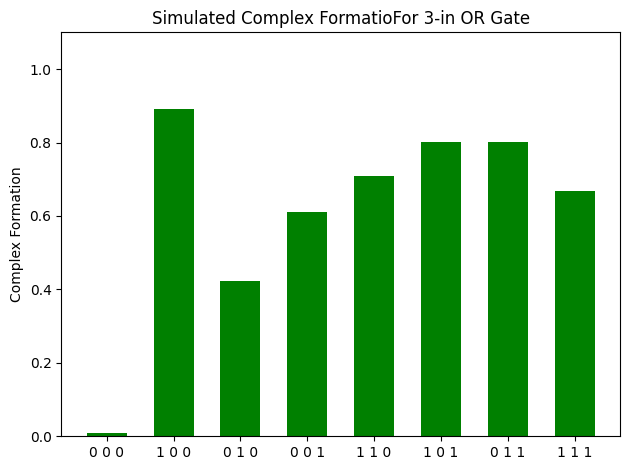

In [ ]:
def OR_rxn1(y, t, parameters):
    k1f = parameters['k_f1']
    k1r = parameters['k_r1']
    AD, DBD, AD_DBD = y
    dADdt = -k1f * AD * DBD + k1r * AD_DBD
    dDBDdt = -k1f * AD * DBD + k1r * AD_DBD
    dAD_DBDdt = k1f * AD * DBD - k1r * AD_DBD
    return [dADdt, dDBDdt, dAD_DBDdt]

def OR_rxn2(y, t, parameters):
    k2f = parameters['k_f2']
    k2r = parameters['k_r2']
    AD, DBD, A, AD_L_DBD = y
    dADdt = -k2f * AD * DBD * A + k2r * AD_L_DBD
    dDBDdt = -k2f * AD * DBD * A + k2r * AD_L_DBD
    dAdt = -k2f * AD * DBD * A + k2r * AD_L_DBD
    dAD_L_DBDdt = +k2f * AD * DBD * A - k2r * AD_L_DBD
    return [dADdt, dDBDdt, dAdt, dAD_L_DBDdt]

def OR_rxn3(y, t, parameters):
    k3f = parameters['k_f3']
    k3r = parameters['k_r3']
    AD, DBD, B, AD_L_DBD = y
    dADdt = -k3f * AD * DBD * B + k3r * AD_L_DBD
    dDBDdt = -k3f * AD * DBD * B + k3r * AD_L_DBD
    dBdt = -k3f * AD * DBD * B + k3r * AD_L_DBD
    dAD_L_DBDdt = k3f * AD * DBD * B - k3r * AD_L_DBD
    return [dADdt, dDBDdt, dBdt, dAD_L_DBDdt]



def OR_rxn4(y, t, parameters):
    k_f4 = parameters['k_f4']
    k_r4 = parameters['k_r4']
    AD, DBD, C, AD_L_DBD = y
    dADdt = -k_f4 * AD * DBD * C + k_r4 * AD_L_DBD
    dDBDdt = -k_f4 * AD * DBD * C + k_r4 * AD_L_DBD
    dCdt = -k_f4 * AD * DBD * C + k_r4 * AD_L_DBD
    dAD_L_DBDdt = k_f4 * AD * DBD * C - k_r4 * AD_L_DBD
    return [dADdt, dDBDdt, dCdt, dAD_L_DBDdt]

def OR_rxn5(y, t, parameters):
    k_f5 = parameters['k_f5']
    k_r5 = parameters['k_r5']
    AD, DBD, A, B, AD_L_DBD = y
    dADdt = -k_f5 * AD * DBD * A*B + k_r5 * AD_L_DBD
    dDBDdt = -k_f5 * AD * DBD * A*B + k_r5 * AD_L_DBD
    dAdt = -k_f5 * AD * DBD * A*B + k_r5 * AD_L_DBD
    dBdt = -k_f5 * AD * DBD * A*B + k_r5 * AD_L_DBD
    dAD_L_DBDdt = k_f5 * AD * DBD * A*B - k_r5 * AD_L_DBD
    return [dADdt, dDBDdt, dAdt, dBdt, dAD_L_DBDdt]

def OR_rxn6(y, t, parameters):
    k_f6 = parameters['k_f6']
    k_r6 = parameters['k_r6']
    AD, DBD, A, C ,AD_L_DBD = y
    dADdt = -k_f6 * AD * DBD * A * C + k_r6 * AD_L_DBD
    dDBDdt = -k_f6 * AD * DBD * A * C + k_r6 * AD_L_DBD
    dAdt = -k_f6 * AD * DBD * A * C + k_r6 * AD_L_DBD
    dCdt = -k_f6 * AD * DBD * A * C + k_r6 * AD_L_DBD
    dAD_L_DBDdt = k_f6 * AD * DBD * A * C - k_r6 * AD_L_DBD
    return [dADdt, dDBDdt, dAdt, dCdt, dAD_L_DBDdt]

def OR_rxn7(y, t, parameters):
    k_f7 = parameters['k_f7']
    k_r7 = parameters['k_r7']
    AD, DBD, B, D, AD_L_DBD = y
    dADdt = -k_f7 * AD * DBD * B * D + k_r7 * AD_L_DBD
    dDBDdt = -k_f7 * AD * DBD * B * D + k_r7 * AD_L_DBD
    dBdt = -k_f7 * AD * DBD * B * D + k_r7 * AD_L_DBD
    dDdt = -k_f7 * AD * DBD * B * D + k_r7 * AD_L_DBD
    dAD_L_DBDdt = k_f7 * AD * DBD * B * D - k_r7 * AD_L_DBD
    return [dADdt, dDBDdt, dBdt, dDdt, dAD_L_DBDdt]

def OR_rxn8(y, t, parameters):
    k_f8 = parameters['k_f8']
    k_r8 = parameters['k_r8']
    AD, DBD, A,B, D, AD_L_DBD = y
    dADdt = -k_f8 * AD * DBD * A*B * D + k_r8 * AD_L_DBD
    dDBDdt = -k_f8 * AD * DBD * A*B * D + k_r8 * AD_L_DBD
    dAdt = -k_f8 * AD * DBD * A*B * D + k_r8 * AD_L_DBD
    dBdt = -k_f8 * AD * DBD * A*B * D + k_r8 * AD_L_DBD
    dDdt = -k_f8 * AD * DBD * A*B * D + k_r8 * AD_L_DBD
    dAD_L_DBDdt = k_f8 * AD * DBD * A*B * D - k_r8 * AD_L_DBD
    return [dADdt, dDBDdt, dAdt, dBdt,dDdt, dAD_L_DBDdt]


k_base_f = 1e5  # Base forward rate constant (M^-1 s^-1)
k_base_r = 1e-9 # Base reverse rate constant (s^-1)

parameters = {
    'k_f1': k_base_f * 0.000008,  'k_r1': k_base_r,
    'k_f2': k_base_f * 0.041,  'k_r2': k_base_r,
    'k_f3': k_base_f * 0.0010,  'k_r3': k_base_r,
    'k_f4': k_base_f * 0.0028,  'k_r4': k_base_r,
    'k_f5': k_base_f * .0006,  'k_r5': k_base_r,
    'k_f6': k_base_f * 0.042,  'k_r6': k_base_r,
    'k_f7': k_base_f * 0.042,  'k_r7': k_base_r,
    'k_f8': k_base_f * 0.001,  'k_r8': k_base_r,
}



# Time points for the simulation
t = np.linspace(0, 1e-2, 100)

# Initial conditions for AD and DBD
AD_initial = 1
DBD_initial = 1

# Define function to solve the ODE for each condition and extract the value of the complex at the end
def simulate_condition(initial_conditions, reaction_function, parameters, t):

    solution = odeint(reaction_function, initial_conditions, t, args=(parameters,))
    # Depending on the specific reaction, extract the value of the correct complex
    if reaction_function == OR_rxn1:
      complex_value = solution[-1, 2] # AD_DBD
    elif reaction_function == OR_rxn2:
        complex_value = solution[-1, 3] # AD_A_DBD
    elif reaction_function == OR_rxn3:
         complex_value = solution[-1, 3] # AD_B_DBD
    elif reaction_function == OR_rxn4:
        complex_value = solution[-1, 3] # AD_D_DBD
    elif reaction_function == OR_rxn5:
        complex_value = solution[-1, 3] # AD_A_B_DBD
    elif reaction_function == OR_rxn6:
         complex_value = solution[-1, 4] # AD_A_D_DBD
    elif reaction_function == OR_rxn7:
         complex_value = solution[-1, 4] # AD_B_D_DBD
    elif reaction_function == OR_rxn8:
        complex_value = solution[-1, 4] # AD_A_B_D_DBD

    return complex_value

results = []

# Scenario 1: AD + DBD ⇌ AD_DBD (0,0,0)
initial_conditions_1 = [AD_initial, DBD_initial, 0] # AD, DBD, AD_DBD
results.append(simulate_condition(initial_conditions_1, OR_rxn1, parameters, t))

# Scenario 2: AD + DBD + A ⇌ AD_A_DBD (1,0,0)
initial_conditions_2 = [AD_initial, DBD_initial, 1, 0] # AD, DBD, A, AD_A_DBD
results.append(simulate_condition(initial_conditions_2, OR_rxn2, parameters, t))

# Scenario 3: AD + DBD + B ⇌ AD_B_DBD (0,1,0)
initial_conditions_3 = [AD_initial, DBD_initial, 1, 0] # AD, DBD, B, AD_B_DBD
results.append(simulate_condition(initial_conditions_3, OR_rxn3, parameters, t))

# Scenario 4: AD + DBD + D ⇌ AD_D_DBD (0,0,1)
initial_conditions_4 = [AD_initial, DBD_initial, 1, 0]  # AD, DBD, D, AD_D_DBD
results.append(simulate_condition(initial_conditions_4, OR_rxn4, parameters, t))

# Scenario 5: AD + DBD + A_B ⇌ AD_A_B_DBD (1,1,0)
initial_conditions_5 = [AD_initial, DBD_initial, 1, 1,0] # AD, DBD, A_B, AD_A_B_DBD
results.append(simulate_condition(initial_conditions_5, OR_rxn5, parameters, t))

# Scenario 6: AD + DBD + A + D ⇌ AD_A_D_DBD (1,0,1)
initial_conditions_6 = [AD_initial, DBD_initial, 1, 1, 0] # AD, DBD, A, D, AD_A_D_DBD
results.append(simulate_condition(initial_conditions_6, OR_rxn6, parameters, t))

# Scenario 7: AD + DBD + B + D ⇌ AD_B_D_DBD (0,1,1)
initial_conditions_7 = [AD_initial, DBD_initial, 1, 1, 0] # AD, DBD, B, D, AD_B_D_DBD
results.append(simulate_condition(initial_conditions_7, OR_rxn7, parameters, t))

# Scenario 8: AD + DBD + A_B + D ⇌ AD_A_B_D_DBD (1,1,1)
initial_conditions_8 = [AD_initial, DBD_initial, 1, 1, 1,0] # AD, DBD, A_B, D, AD_A_B_D_DBD
results.append(simulate_condition(initial_conditions_8, OR_rxn8, parameters, t))

# Plotting
x_labels = ['0 0 0', '1 0 0', '0 1 0', '0 0 1','1 1 0', '1 0 1', '0 1 1', '1 1 1']
x = np.arange(len(x_labels))
width = 0.6

fig, ax = plt.subplots()
rects = ax.bar(x, results, width, label='Simulated Growth', color='green')
ax.set_ylabel('Complex Formation')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, 1.1)
plt.title("Simulated Complex FormatioFor 3-in OR Gate")
fig.tight_layout()
plt.show()

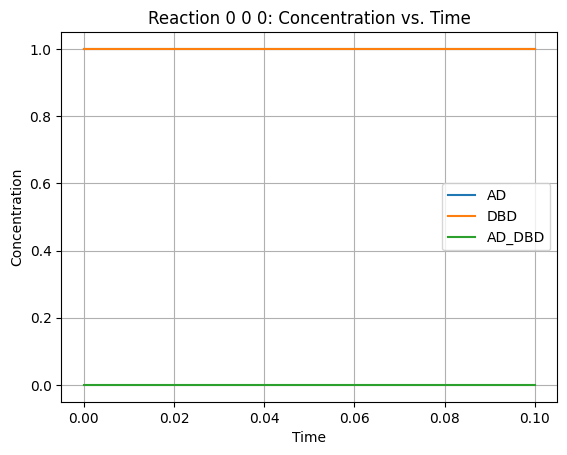

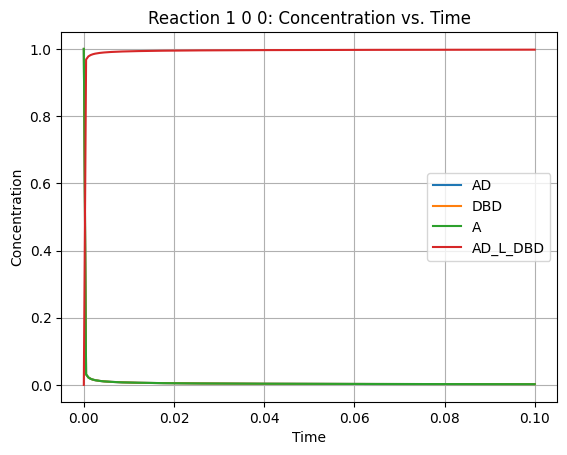

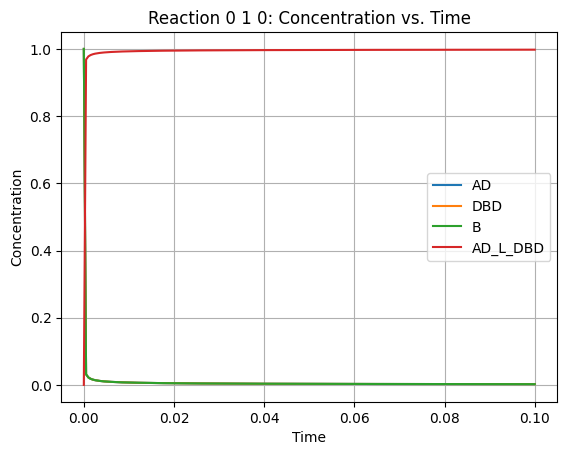

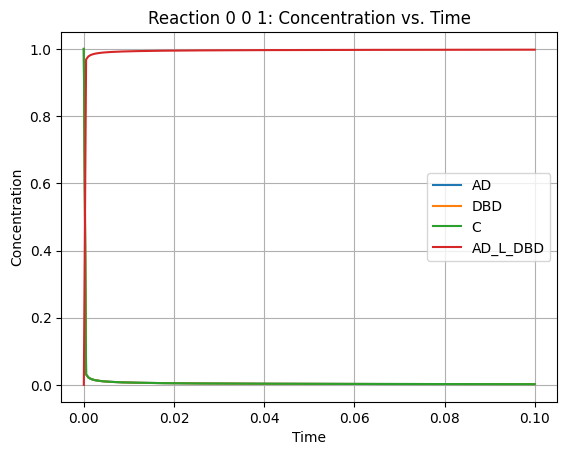

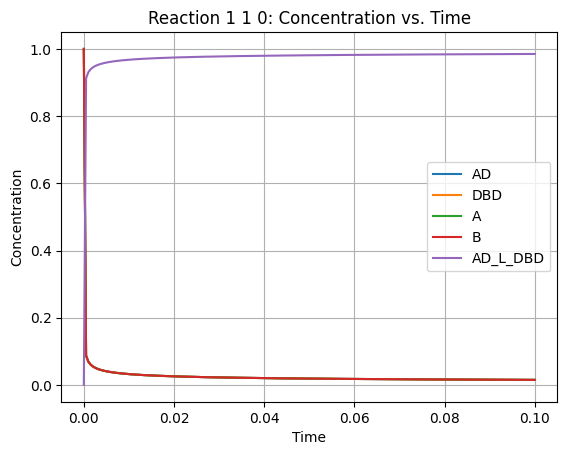

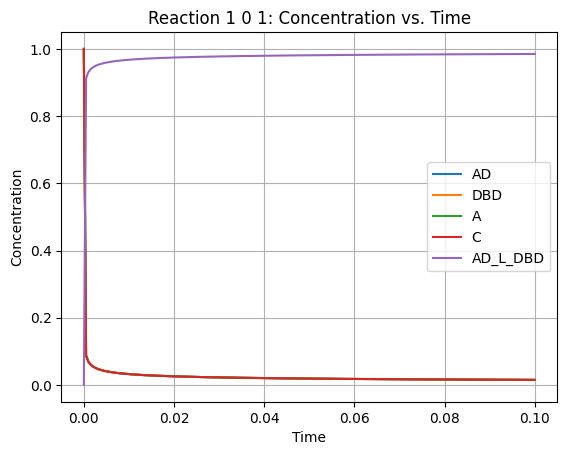

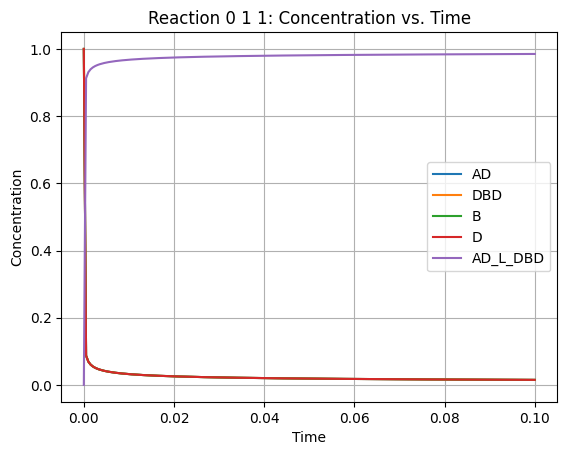

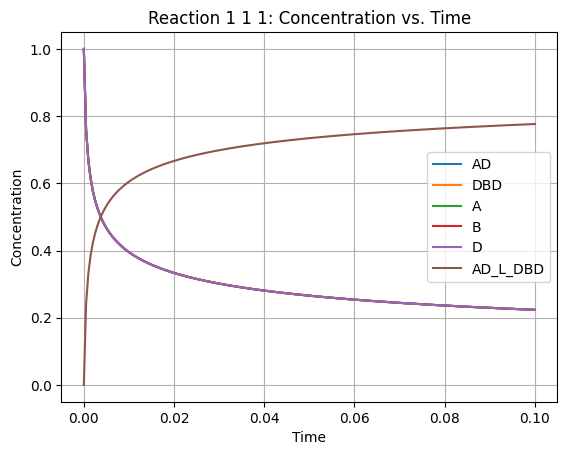

In [ ]:
def simulate_and_plot(reaction_function, initial_conditions, parameters, t, label):
    sol = odeint(reaction_function, initial_conditions, t, args=(parameters,))
    plt.figure()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.title(f"Reaction {label}: Concentration vs. Time")

    if reaction_function == OR_rxn1:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='AD_DBD')
    elif reaction_function == OR_rxn2:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='A')
        plt.plot(t, sol[:, 3], label='AD_L_DBD')
    elif reaction_function == OR_rxn3:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='B')
        plt.plot(t, sol[:, 3], label='AD_L_DBD')
    elif reaction_function == OR_rxn4:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='C')
        plt.plot(t, sol[:, 3], label='AD_L_DBD')
    elif reaction_function == OR_rxn5:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='A')
        plt.plot(t, sol[:, 3], label='B')
        plt.plot(t, sol[:, 4], label='AD_L_DBD')
    elif reaction_function == OR_rxn6:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='A')
        plt.plot(t, sol[:, 3], label='C')
        plt.plot(t, sol[:, 4], label='AD_L_DBD')
    elif reaction_function == OR_rxn7:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='B')
        plt.plot(t, sol[:, 3], label='D')
        plt.plot(t, sol[:, 4], label='AD_L_DBD')
    elif reaction_function == OR_rxn8:
        plt.plot(t, sol[:, 0], label='AD')
        plt.plot(t, sol[:, 1], label='DBD')
        plt.plot(t, sol[:, 2], label='A')
        plt.plot(t, sol[:, 3], label='B')
        plt.plot(t, sol[:, 4], label='D')
        plt.plot(t, sol[:, 5], label='AD_L_DBD')


    plt.legend()
    plt.grid(True)
    plt.show()

# Time points for the simulation
t = np.linspace(0, .1, 200)

# Initial conditions for AD and DBD
AD_initial = 1
DBD_initial = 1
AD_DBD_initial = 0

# Run simulations for all scenarios and generate plots
x_labels = ['0 0 0', '1 0 0', '0 1 0', '0 0 1', '1 1 0','1 0 1','0 1 1','1 1 1']
reactions = [OR_rxn1, OR_rxn2, OR_rxn3, OR_rxn4, OR_rxn5, OR_rxn6, OR_rxn7, OR_rxn8]

# Parameter sets for each reaction
parameters_list = [
    {'k_f1': 1e-4, 'k_r1': 1e4 },
    {'k_f1': 1e-4, 'k_r1': 1e4, 'k_f2': 1e6, 'k_r2': 1e-6},
    {'k_f1': 1e-4, 'k_r1': 1e4, 'k_f3': 1e6, 'k_r3': 1e-3},
    {'k_f1': 1e-4, 'k_r1': 1e4, 'k_f4': 1e6, 'k_r4': 1e-3},
     {'k_f1': 1e-4, 'k_r1': 1e4, 'k_f5': 1e6, 'k_r5': 1e-3},
      {'k_f1': 1e-4, 'k_r1': 1e4, 'k_f6': 1e6, 'k_r6': 1e-3},
      {'k_f1': 1e-4, 'k_r1': 1e4, 'k_f7': 1e6, 'k_r7': 1e-3},
    {'k_f1': 1e4, 'k_f2': 1e3, 'k_r2': 1e-3, 'k_f8': 1e3, 'k_r8':1e-3}
]
initial_conditions = [
    [AD_initial, DBD_initial, AD_DBD_initial],
    [AD_initial, DBD_initial, 1, 0], # Initial A at 1
    [AD_initial, DBD_initial, 1, 0], # Initial B at 1
    [AD_initial, DBD_initial, 1, 0],  # Initial C at 1
    [AD_initial, DBD_initial, 1, 1, 0], # Initial A,B at 1
    [AD_initial, DBD_initial, 1, 1, 0],  # Initial A,C at 1
     [AD_initial, DBD_initial, 1, 1, 0], # Initial B,D at 1
    [AD_initial, DBD_initial, 1, 1, 1, 0]  # Initial A, B, D at 1
]
for i, (reaction_func, initial_cond, label, params) in enumerate(zip(reactions, initial_conditions, x_labels, parameters_list)):
    simulate_and_plot(reaction_func, initial_cond, params, t, label)

# 3-input DNF gate

AD + DBD ⇌ AD_DBD (-,-,-)

AD + DBD + A ⇌ AD_A_DBD (+,-,-)

AD + DBD + B ⇌ AD_B_DBD (-,+,-)

AD + DBD + D ⇌ AD_D_DBD (-,-,+)

AD + DBD + A_B ⇌ AD_A_B_DBD (+,+,-)

AD + DBD + A + D ⇌ AD_A_D_DBD (+,-,+)

AD + DBD + B + D ⇌ AD_B_D_DBD (-,+,+)

AD + DBD + A_B + D ⇌ AD_A_B_D_DBD (+,+,+)



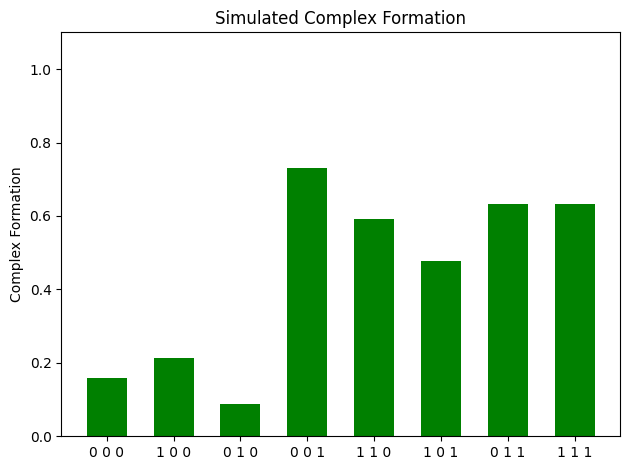

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equations for each reaction scenario
def DNF_rxn1(y, t, parameters):
    k1f = parameters['k_f1']
    k1r = parameters['k_r1']
    AD, DBD, AD_DBD = y
    dADdt = -k1f * AD * DBD + k1r * AD_DBD
    dDBDdt = -k1f * AD * DBD + k1r * AD_DBD
    dAD_DBDdt = k1f * AD * DBD - k1r * AD_DBD
    return [dADdt, dDBDdt, dAD_DBDdt]

def DNF_rxn2(y, t, parameters):
    k2f = parameters['k_f2']
    k2r = parameters['k_r2']
    AD, DBD, A, AD_A_DBD = y
    dADdt = -k2f * AD * DBD * A + k2r * AD_A_DBD
    dDBDdt = -k2f * AD * DBD * A + k2r * AD_A_DBD
    dAdt = -k2f * AD * DBD * A + k2r * AD_A_DBD
    dAD_A_DBDdt = k2f * AD * DBD * A - k2r * AD_A_DBD
    return [dADdt, dDBDdt, dAdt, dAD_A_DBDdt]

def DNF_rxn3(y, t, parameters):
    k3f = parameters['k_f3']
    k3r = parameters['k_r3']
    AD, DBD, B, AD_B_DBD = y
    dADdt = -k3f * AD * DBD * B + k3r * AD_B_DBD
    dDBDdt = -k3f * AD * DBD * B + k3r * AD_B_DBD
    dBdt = -k3f * AD * DBD * B + k3r * AD_B_DBD
    dAD_B_DBDdt = k3f * AD * DBD * B - k3r * AD_B_DBD
    return [dADdt, dDBDdt, dBdt, dAD_B_DBDdt]


def DNF_rxn4(y, t, parameters):
    k_f4 = parameters['k_f4']
    k_r4 = parameters['k_r4']
    AD, DBD, D, AD_D_DBD = y
    dADdt = -k_f4 * AD * DBD * D + k_r4 * AD_D_DBD
    dDBDdt = -k_f4 * AD * DBD * D + k_r4 * AD_D_DBD
    dDdt = -k_f4 * AD * DBD * D + k_r4 * AD_D_DBD
    dAD_D_DBDdt = k_f4 * AD * DBD * D - k_r4 * AD_D_DBD
    return [dADdt, dDBDdt, dDdt, dAD_D_DBDdt]

def DNF_rxn5(y, t, parameters):
    k_f5 = parameters['k_f5']
    k_r5 = parameters['k_r5']
    AD, DBD, A_B, AD_A_B_DBD = y
    dADdt = -k_f5 * AD * DBD * A_B + k_r5 * AD_A_B_DBD
    dDBDdt = -k_f5 * AD * DBD * A_B + k_r5 * AD_A_B_DBD
    dA_Bdt = -k_f5 * AD * DBD * A_B + k_r5 * AD_A_B_DBD
    dAD_A_B_DBDdt = k_f5 * AD * DBD * A_B - k_r5 * AD_A_B_DBD
    return [dADdt, dDBDdt, dA_Bdt, dAD_A_B_DBDdt]

def DNF_rxn6(y, t, parameters):
    k_f6 = parameters['k_f6']
    k_r6 = parameters['k_r6']
    AD, DBD, A, D, AD_A_D_DBD = y
    dADdt = -k_f6 * AD * DBD * A * D + k_r6 * AD_A_D_DBD
    dDBDdt = -k_f6 * AD * DBD * A * D + k_r6 * AD_A_D_DBD
    dAdt = -k_f6 * AD * DBD * A * D + k_r6 * AD_A_D_DBD
    dDdt = -k_f6 * AD * DBD * A * D + k_r6 * AD_A_D_DBD
    dAD_A_D_DBDdt = k_f6 * AD * DBD * A * D - k_r6 * AD_A_D_DBD
    return [dADdt, dDBDdt, dAdt, dDdt, dAD_A_D_DBDdt]


def DNF_rxn7(y, t, parameters):
    k_f7 = parameters['k_f7']
    k_r7 = parameters['k_r7']
    AD, DBD, B, D, AD_B_D_DBD = y
    dADdt = -k_f7 * AD * DBD * B * D + k_r7 * AD_B_D_DBD
    dDBDdt = -k_f7 * AD * DBD * B * D + k_r7 * AD_B_D_DBD
    dBdt = -k_f7 * AD * DBD * B * D + k_r7 * AD_B_D_DBD
    dDdt = -k_f7 * AD * DBD * B * D + k_r7 * AD_B_D_DBD
    dAD_B_D_DBDdt = k_f7 * AD * DBD * B * D - k_r7 * AD_B_D_DBD
    return [dADdt, dDBDdt, dBdt, dDdt, dAD_B_D_DBDdt]

def DNF_rxn8(y, t, parameters):
    k_f8 = parameters['k_f8']
    k_r8 = parameters['k_r8']
    AD, DBD, A_B, D, AD_A_B_D_DBD = y
    dADdt = -k_f8 * AD * DBD * A_B * D + k_r8 * AD_A_B_D_DBD
    dDBDdt = -k_f8 * AD * DBD * A_B * D + k_r8 * AD_A_B_D_DBD
    dA_Bdt = -k_f8 * AD * DBD * A_B * D + k_r8 * AD_A_B_D_DBD
    dDdt = -k_f8 * AD * DBD * A_B * D + k_r8 * AD_A_B_D_DBD
    dAD_A_B_D_DBDdt = k_f8 * AD * DBD * A_B * D - k_r8 * AD_A_B_D_DBD
    return [dADdt, dDBDdt, dA_Bdt, dDdt, dAD_A_B_D_DBDdt]


# Parameters for the simulation based on the conditions
k_base_f = 1e5
k_base_r = 1e-9

parameters = {
    'k_f1': k_base_f * 0.019,  'k_r1': k_base_r,
    'k_f2': k_base_f * 0.031,  'k_r2': k_base_r,
    'k_f3': k_base_f * 0.010,  'k_r3': k_base_r,
    'k_f4': k_base_f * 0.643,  'k_r4': k_base_r,
    'k_f5': k_base_f * 0.25,  'k_r5': k_base_r,
    'k_f6': k_base_f * 0.20,  'k_r6': k_base_r,
    'k_f7': k_base_f * 0.640,  'k_r7': k_base_r,
    'k_f8': k_base_f * 0.638,  'k_r8': k_base_r,
}



# Time points for the simulation
t = np.linspace(0, 1e-3, 100)

# Initial conditions for AD and DBD
AD_initial = 1
DBD_initial = 1

# Define function to solve the ODE for each condition and extract the value of the complex at the end
def simulate_condition(initial_conditions, reaction_function, parameters, t):

    solution = odeint(reaction_function, initial_conditions, t, args=(parameters,))
    # Depending on the specific reaction, extract the value of the correct complex
    if reaction_function == DNF_rxn1:
      complex_value = solution[-1, 2] # AD_DBD
    elif reaction_function == DNF_rxn2:
        complex_value = solution[-1, 3] # AD_A_DBD
    elif reaction_function == DNF_rxn3:
         complex_value = solution[-1, 3] # AD_B_DBD
    elif reaction_function == DNF_rxn4:
        complex_value = solution[-1, 3] # AD_D_DBD
    elif reaction_function == DNF_rxn5:
        complex_value = solution[-1, 3] # AD_A_B_DBD
    elif reaction_function == DNF_rxn6:
         complex_value = solution[-1, 4] # AD_A_D_DBD
    elif reaction_function == DNF_rxn7:
         complex_value = solution[-1, 4] # AD_B_D_DBD
    elif reaction_function == DNF_rxn8:
        complex_value = solution[-1, 4] # AD_A_B_D_DBD

    return complex_value


# Run simulations
results = []

# Scenario 1: AD + DBD ⇌ AD_DBD (0,0,0)
initial_conditions_1 = [AD_initial, DBD_initial, 0] # AD, DBD, AD_DBD
results.append(simulate_condition(initial_conditions_1, DNF_rxn1, parameters, t))

# Scenario 2: AD + DBD + A ⇌ AD_A_DBD (1,0,0)
initial_conditions_2 = [AD_initial, DBD_initial, 1, 0] # AD, DBD, A, AD_A_DBD
results.append(simulate_condition(initial_conditions_2, DNF_rxn2, parameters, t))

# Scenario 3: AD + DBD + B ⇌ AD_B_DBD (0,1,0)
initial_conditions_3 = [AD_initial, DBD_initial, 1, 0] # AD, DBD, B, AD_B_DBD
results.append(simulate_condition(initial_conditions_3, DNF_rxn3, parameters, t))

# Scenario 4: AD + DBD + D ⇌ AD_D_DBD (0,0,1)
initial_conditions_4 = [AD_initial, DBD_initial, 1, 0]  # AD, DBD, D, AD_D_DBD
results.append(simulate_condition(initial_conditions_4, DNF_rxn4, parameters, t))

# Scenario 5: AD + DBD + A_B ⇌ AD_A_B_DBD (1,1,0)
initial_conditions_5 = [AD_initial, DBD_initial, 1, 0] # AD, DBD, A_B, AD_A_B_DBD
results.append(simulate_condition(initial_conditions_5, DNF_rxn5, parameters, t))

# Scenario 6: AD + DBD + A + D ⇌ AD_A_D_DBD (1,0,1)
initial_conditions_6 = [AD_initial, DBD_initial, 1, 1, 0] # AD, DBD, A, D, AD_A_D_DBD
results.append(simulate_condition(initial_conditions_6, DNF_rxn6, parameters, t))

# Scenario 7: AD + DBD + B + D ⇌ AD_B_D_DBD (0,1,1)
initial_conditions_7 = [AD_initial, DBD_initial, 1, 1, 0] # AD, DBD, B, D, AD_B_D_DBD
results.append(simulate_condition(initial_conditions_7, DNF_rxn7, parameters, t))

# Scenario 8: AD + DBD + A_B + D ⇌ AD_A_B_D_DBD (1,1,1)
initial_conditions_8 = [AD_initial, DBD_initial, 1, 1, 0] # AD, DBD, A_B, D, AD_A_B_D_DBD
results.append(simulate_condition(initial_conditions_8, DNF_rxn8, parameters, t))



# Plotting
x_labels = ['0 0 0', '1 0 0', '0 1 0', '0 0 1','1 1 0', '1 0 1', '0 1 1', '1 1 1']
x = np.arange(len(x_labels))
width = 0.6

fig, ax = plt.subplots()
rects = ax.bar(x, results, width, label='Simulated Growth', color='green')

#
ax.set_ylabel('Complex Formation')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, 1.1)


plt.title("Simulated Complex Formation")
fig.tight_layout()
plt.show()

# General visualization functions

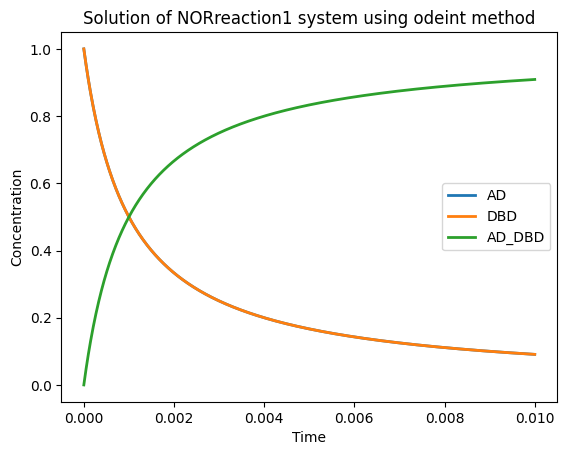

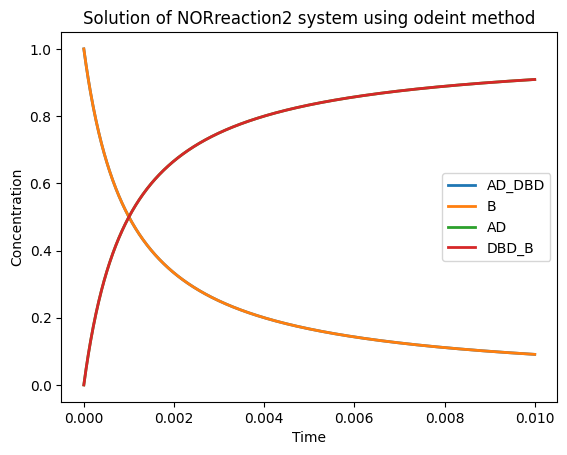

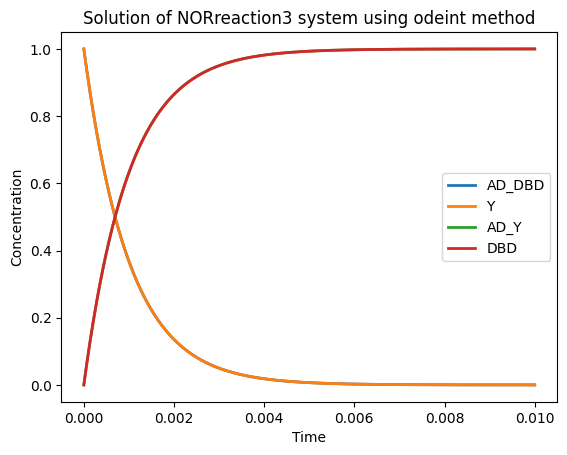

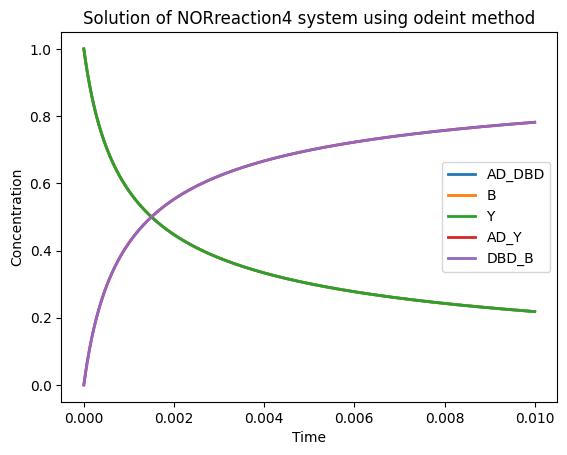

In [ ]:
#Importing necessary libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import inspect, re

# Creating the functions
def get_y_names(reaction):
  '''
  reaction --> reaction function call that gives the numpy array of the differential quantities
  '''
  # Get the source code of the function
  source_code = inspect.getsource(reaction)

  # Use regex to find the line where y is unpacked
  match = re.search(r'\s*(\w+(?:,\s*\w+)*)\s*=\s*y', source_code)

  if match:
        return [name.strip() for name in match.group(1).split(',')]
  return []

def solve_visualize(reaction, initial_conditions, rates):

  '''
  reaction --> reaction function call that gives the numpy array of the differential quantities
  initial_conditions --> a list of initial oncentration for each reactant
  rates --> a tuple of reaction rate constants forward and reverse respectively
  '''

  # Defining time and getting the solution
  t = np.linspace(0, 0.01, 1000)
  solution = odeint(reaction, initial_conditions, t, rates)

  # To distribute the values of the reactants and to name the curves on the plot figure
  names = get_y_names(reaction)
  for name, value in zip(names, solution.T):
    globals()[name] = value

  # Plotting the figure
  plt.figure()
  for i in range(len(solution.T)): # Loop through the columns (components) of the solution
    plt.plot(t, solution.T[i], label = names[i], linewidth=2)
  plt.xlabel("Time")
  plt.ylabel("Concentration")
  plt.title('Solution of %s system using odeint method' %(str(reaction).split()[1]))
  plt.legend()
  plt.show()

  return

# Running the functions
solve_visualize(NORreaction1, [1, 1, 0], (1e3, 1e-4))
solve_visualize(NORreaction2, [1, 1, 0, 0], (1e3, 1e-4))
solve_visualize(NORreaction3, [1, 1, 0, 0], (1e3, 1e-4))
solve_visualize(NORreaction4, [1, 1, 1, 0, 0], (1e3, 1e-4))